# __01 Data Visualization with ggplot2__

In [129]:
library(ggplot2)
library(tibble)
library(tidyr)
library(readr)
library(purrr)
library(dplyr)

In [130]:
?mpg

mpg {ggplot2},R Documentation


In [131]:
mpg %>%
    head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


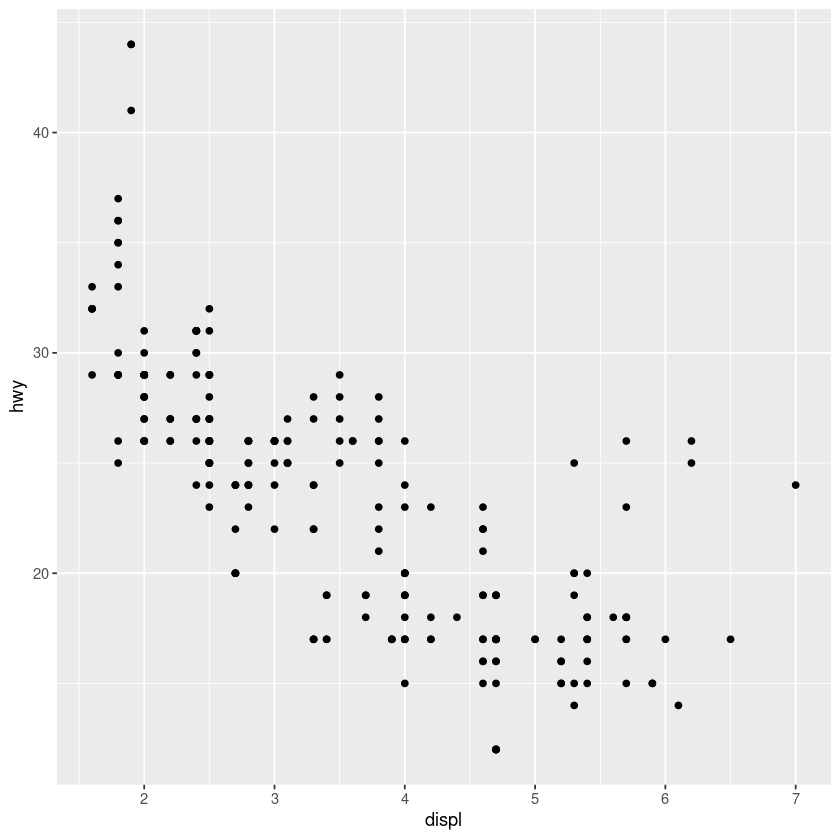

In [132]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size ( displ )
and fuel efficiency ( hwy ). In other words, cars with big engines use
more fuel. Does this confirm or refute your hypothesis about fuel
efficiency and engine size?

You complete your graph by adding one or more layers to ggplot() .
The function geom_point() adds a layer of points to your plot,
which creates a scatterplot. ggplot2 comes with many geom func‐
tions that each add a different type of layer to a plot. You’ll learn a
whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a mapping argument. This
defines how variables in your dataset are mapped to visual proper‐
ties. The mapping argument is always paired with aes() , and the x
and y arguments of aes() specify which variables to map to the x-
and y-axes. ggplot2 looks for the mapped variable in the data argu‐
ment, in this case, mpg .

Let’s turn this code into a reusable template for making graphs with
ggplot2. To make a graph, replace the bracketed sections in the fol‐
lowing code with a dataset, a geom function, or a collection of map‐
pings:
```r
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

An aesthetic is a visual prop‐
erty of the objects in your plot. Aesthetics include things like the
size, the shape, or the color of your points. You can display a point
(like the one shown next) in different ways by changing the values of
its aesthetic properties. Since we already use the word “value” to
describe data, let’s use the word “level” to describe aesthetic proper‐
ties. Here we change the levels of a point’s size, shape, and color to
make the point small, triangular, or blue,

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset.

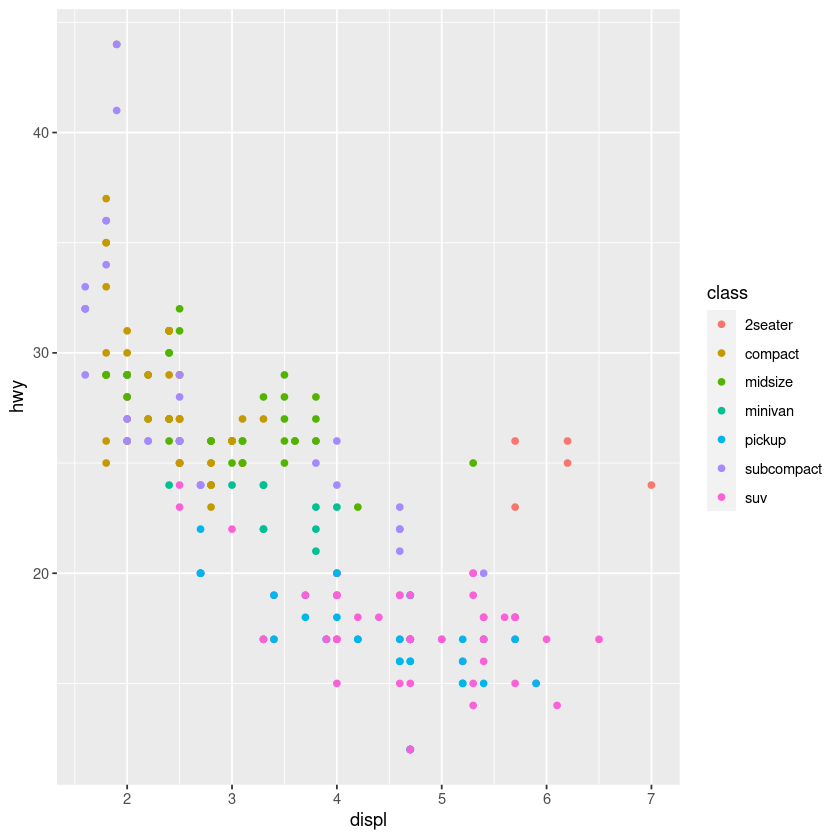

In [133]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

__T o map an aesthetic to a variable, associate the name of the aesthetic to the name of the varible inside__ `aes()`

ggplot2 will automatically
assign a unique level of the aesthetic (here a unique color) to each
unique value of the variable, a process known as scaling. ggplot2 will
also add a legend that explains which levels correspond to which
values.

We could have mapped class to the size aesthetic in the same
way. In this case, the exact size of each point would reveal its class
affiliation. We get a warning here, because mapping an unordered
variable ( class ) to an ordered aesthetic ( size ) is not a good idea:

Warning message:
“Using size for a discrete variable is not advised.”


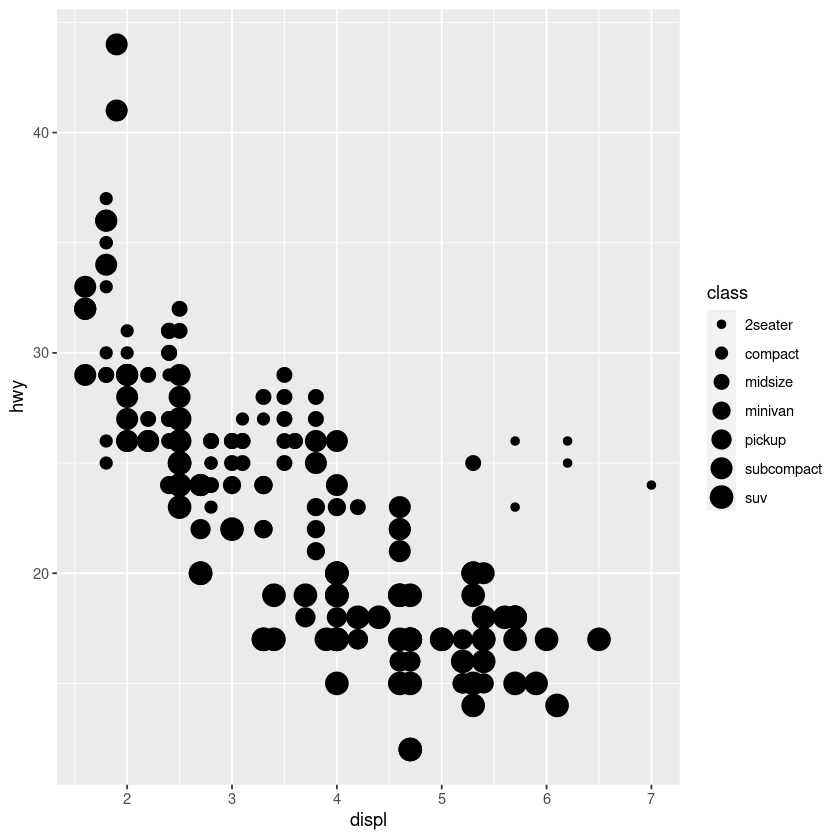

In [134]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = class))

Or we could have mapped class to the alpha aesthetic, which controls the transparency of the points, or the shape of the points:


Warning message:
“Using alpha for a discrete variable is not advised.”


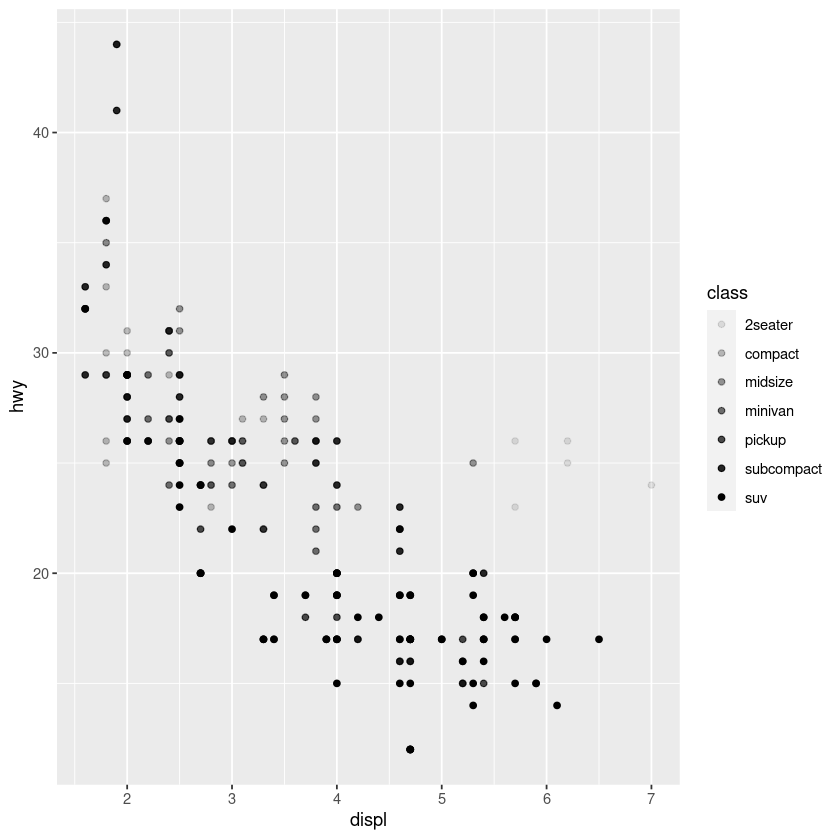

In [135]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


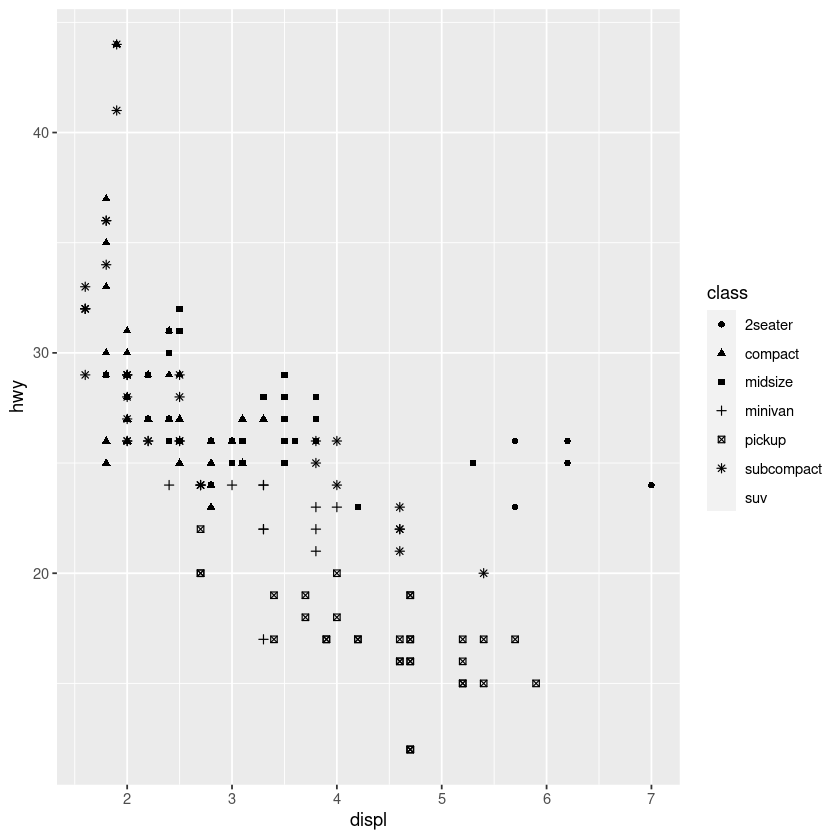

In [136]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, shape = class))

For each aesthetic you use, the aes() to associate the name of the
aesthetic with a variable to display. The aes() function gathers
together each of the aesthetic mappings used by a layer and passes
them to the layer’s mapping argument. The syntax highlights a use‐
ful insight about x and y : the x and y locations of a point are them‐
selves aesthetics, visual properties that you can map to variables to
display information about the data.

Once you map an aesthetic, ggplot2 takes care of the rest. It selects a
reasonable scale to use with the aesthetic, and it constructs a legend
that explains the mapping between levels and values. For x and y
aesthetics, ggplot2 does not create a legend, but it creates an axis
line with tick marks and a label. The axis line acts as a legend; it
explains the mapping between locations and values.

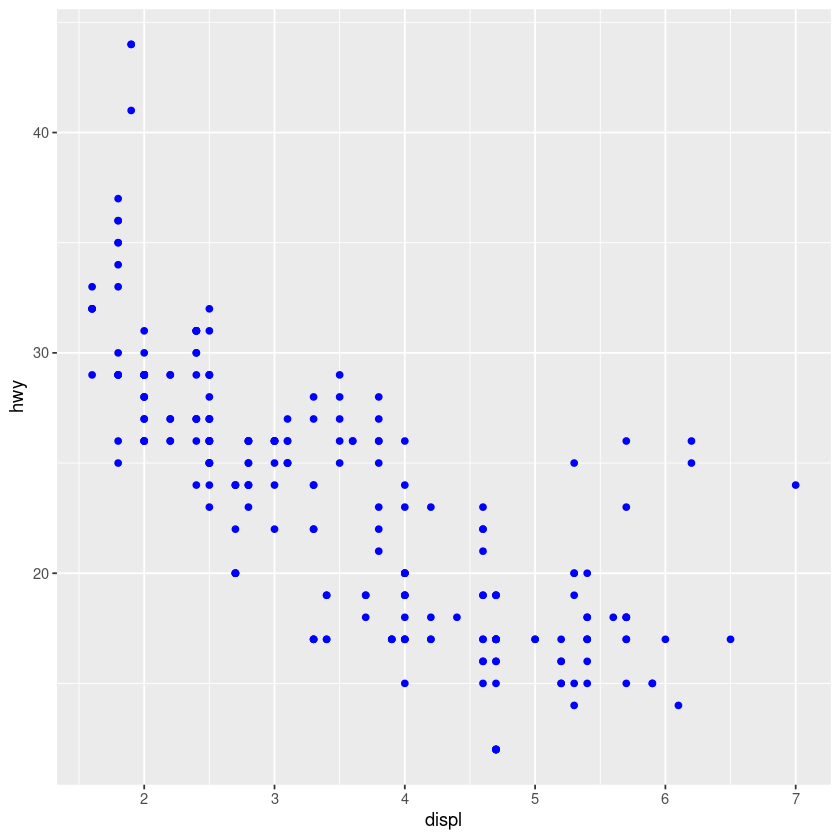

In [137]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

## __Facets__

One way to add additional variables is with aesthetics. Another way,
particularly useful for categorical variables, is to split your plot into
facets, subplots that each display one subset of the data.

To facet your plot by a single variable, use facet_wrap() . The first
argument of facet_wrap() should be a formula, which you create
with ~ followed by a variable name (here “formula” is the name of a
data structure in R, not a synonym for “equation”). The variable that
you pass to facet_wrap() should be discrete:

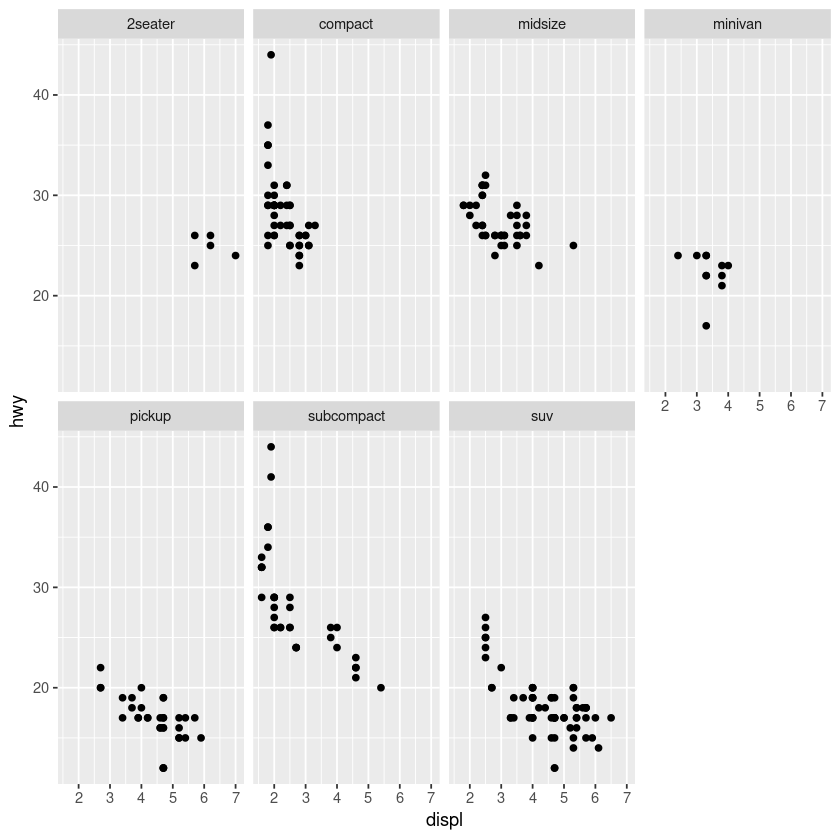

In [138]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ class, nrow = 2)

To facet your plot on the combination of two variables, add
facet_grid() to your plot call. The first argument of facet_grid()
is also a formula. This time the formula should contain two variable
names separated by a ~ :

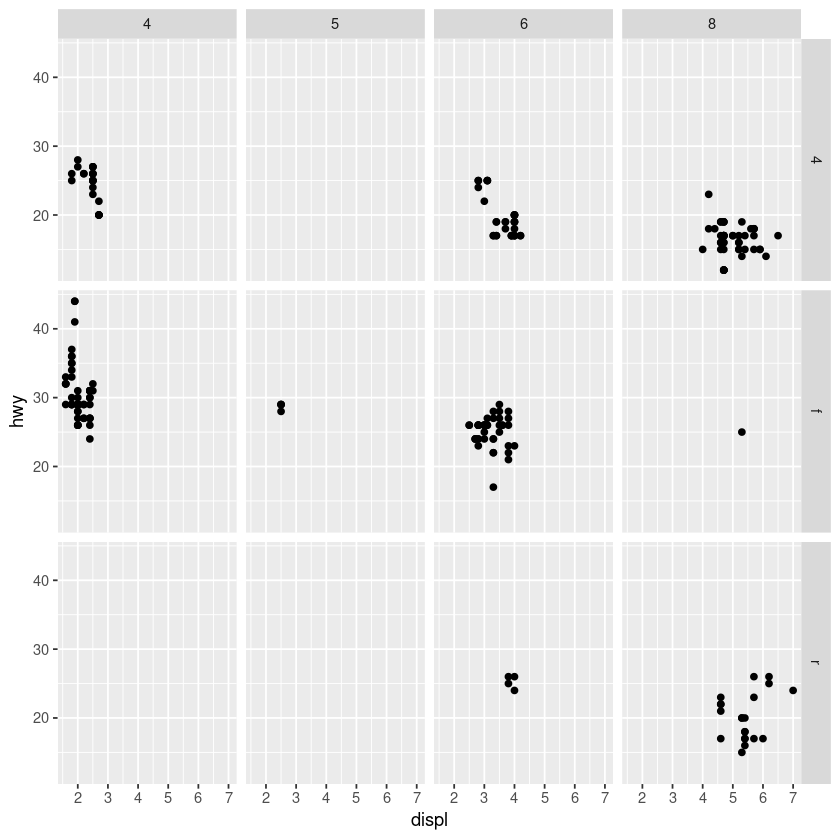

In [139]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(drv ~ cyl)

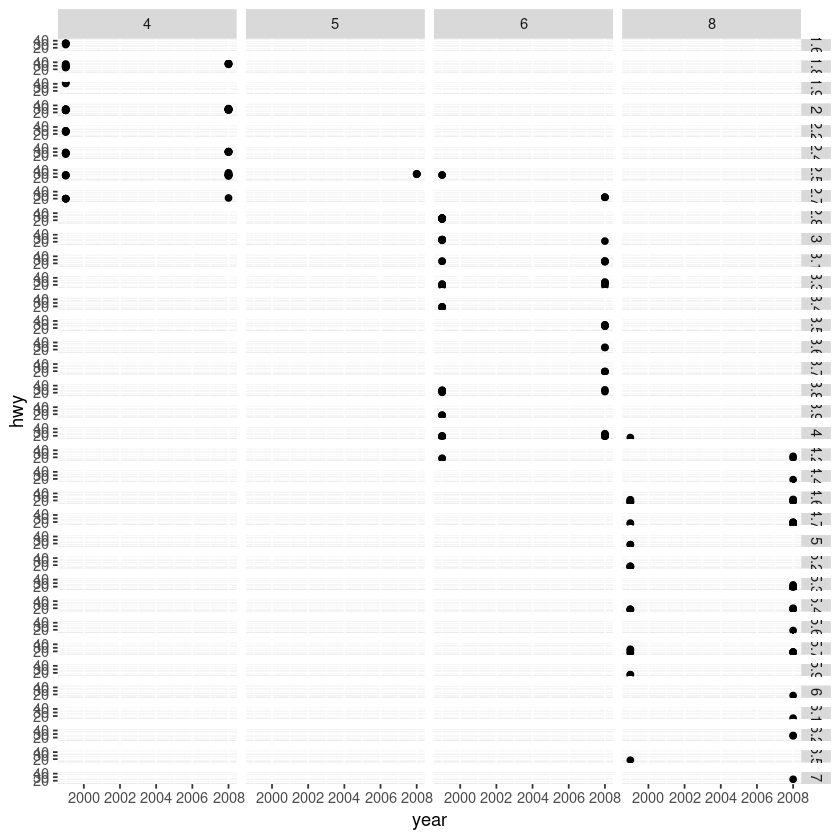

In [140]:
# what happens if you facet on a continuous variable?
# looks like the continuous var is converted to a categorical var
# and makes a facet for each var pair
ggplot(data = mpg) +
    geom_point(mapping = aes(x = year, y = hwy)) +
    facet_grid(displ ~ cyl)

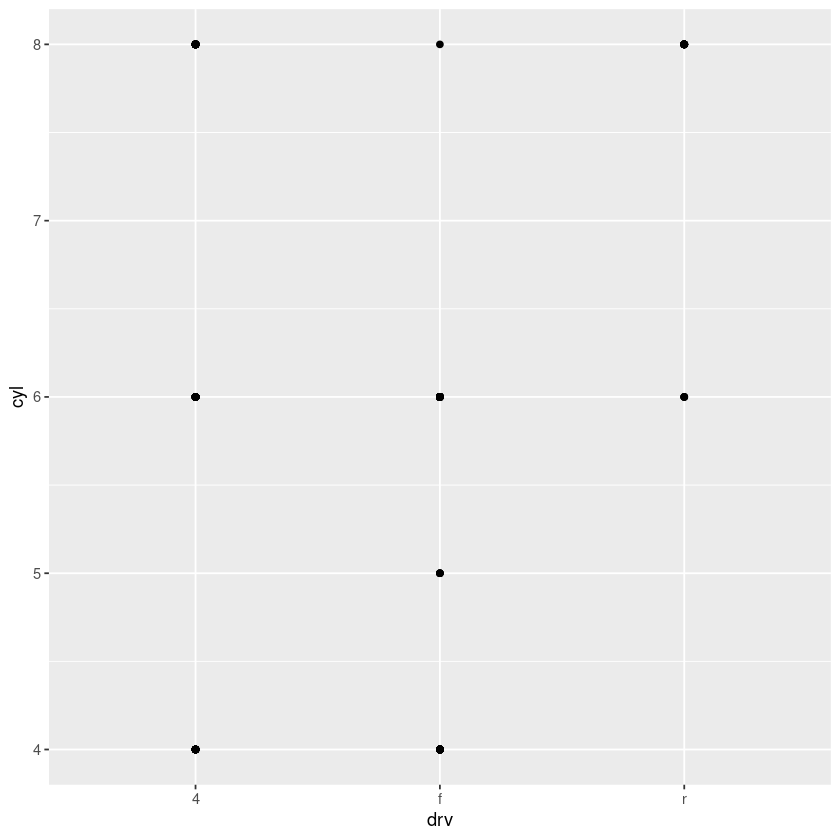

In [141]:
# what do the empty cells in a plot with facet_grid(drv ~ cyl)
# mean? how do they relate to this plot?
# that such combination doesn't exist (or that we do not have that observation)
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = drv, y  = cyl))

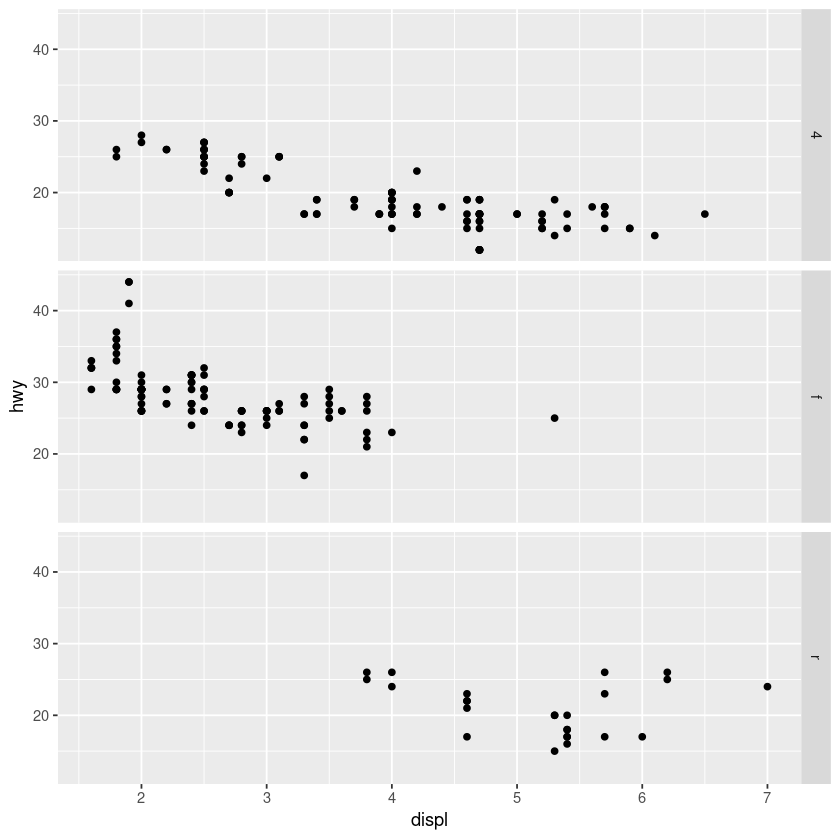

In [142]:
# what plots does the following code make?
# what does . do?
# . ignores the dimension
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(drv ~ .)

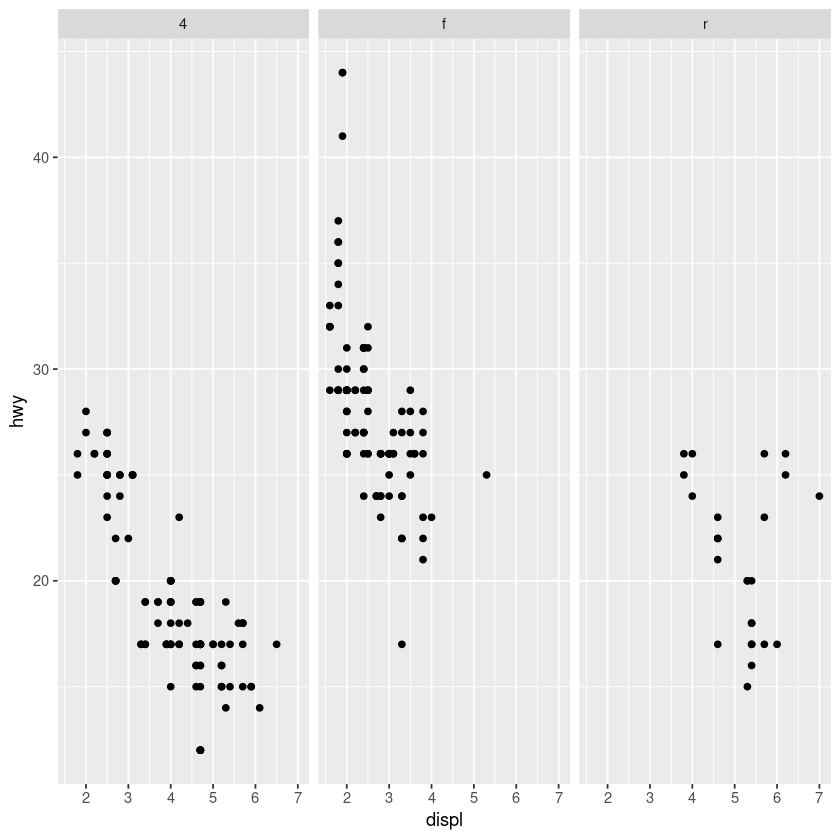

In [143]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(. ~ drv)

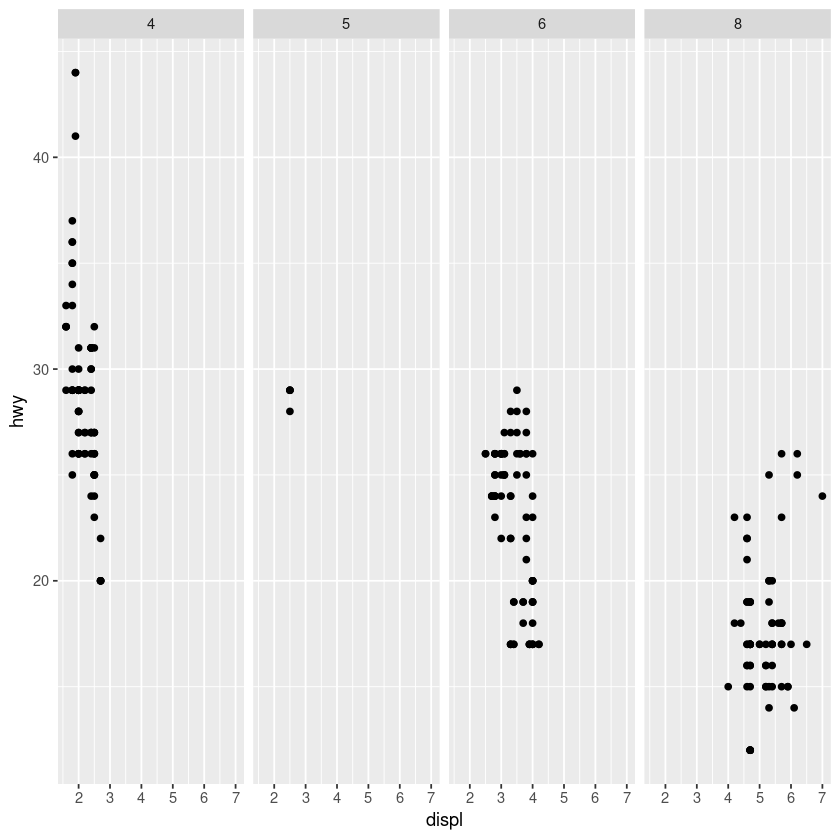

In [144]:
# what does . do?
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_grid(. ~ cyl)

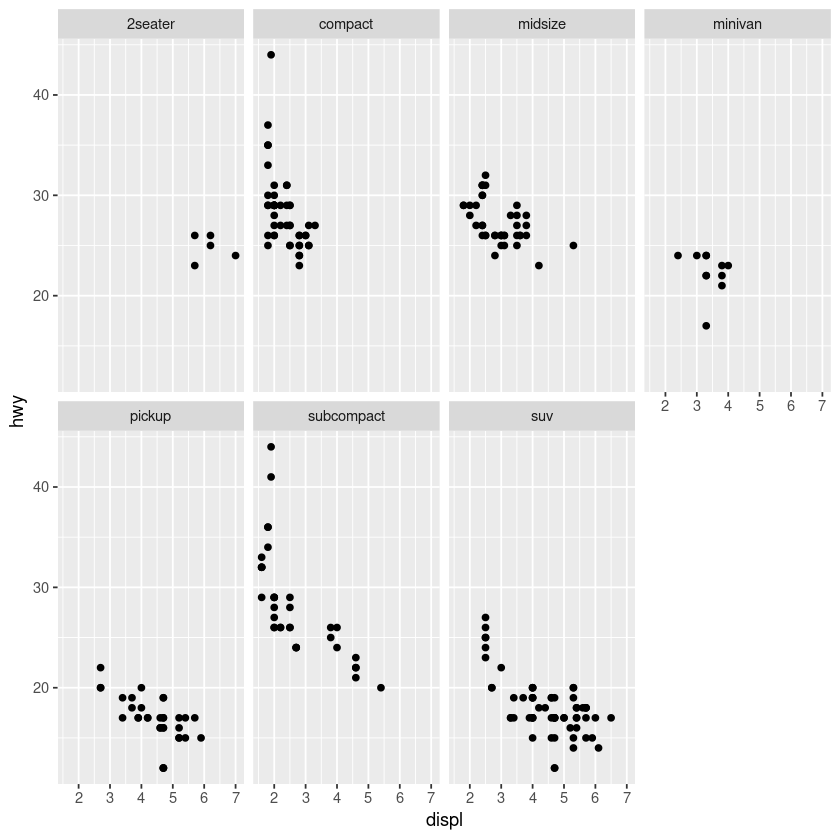

In [145]:
# What are the advantages to using faceting instead of the color
# aesthetic? What are the disadvantages? How might the balance
# change if you had a larger dataset?
# When using coloring, we can compare better the dimensions as we have the points
# in the same space/axis, but as the nubmer of categories grow, it is difficult to differentiate
# from each color, and separate the groups.
# when  doing facets, we can differentiate better the groups when we have more data, we cans ee
# in some sort of the way the region they span, but we find it harder to compare againts
# the other values in the categorie
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    facet_wrap(~ class, nrow = 2)

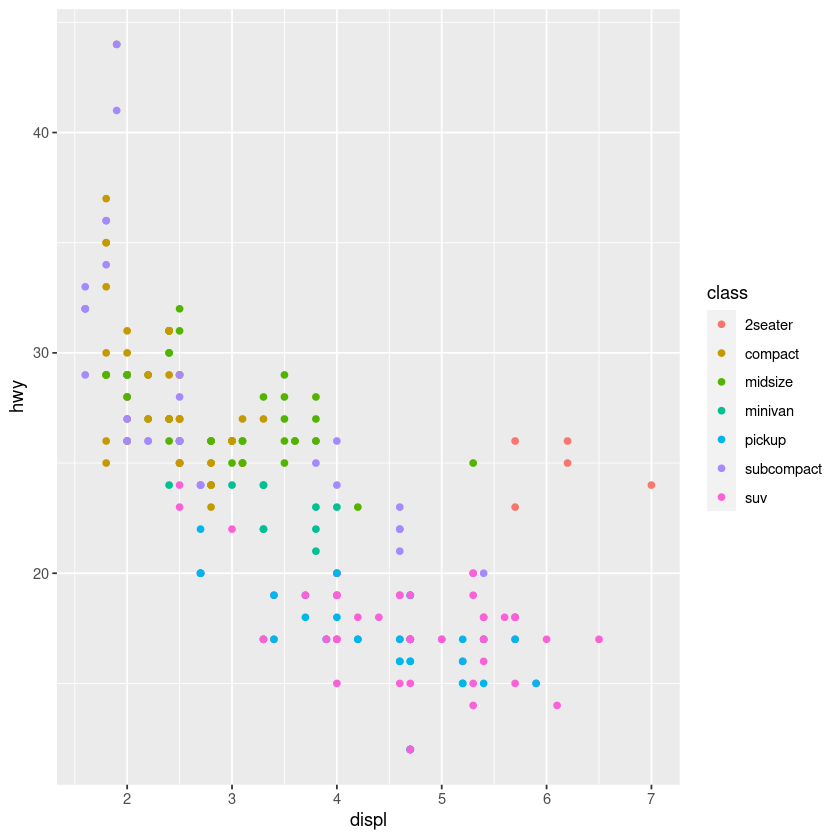

In [146]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

## __Geometric Objects__

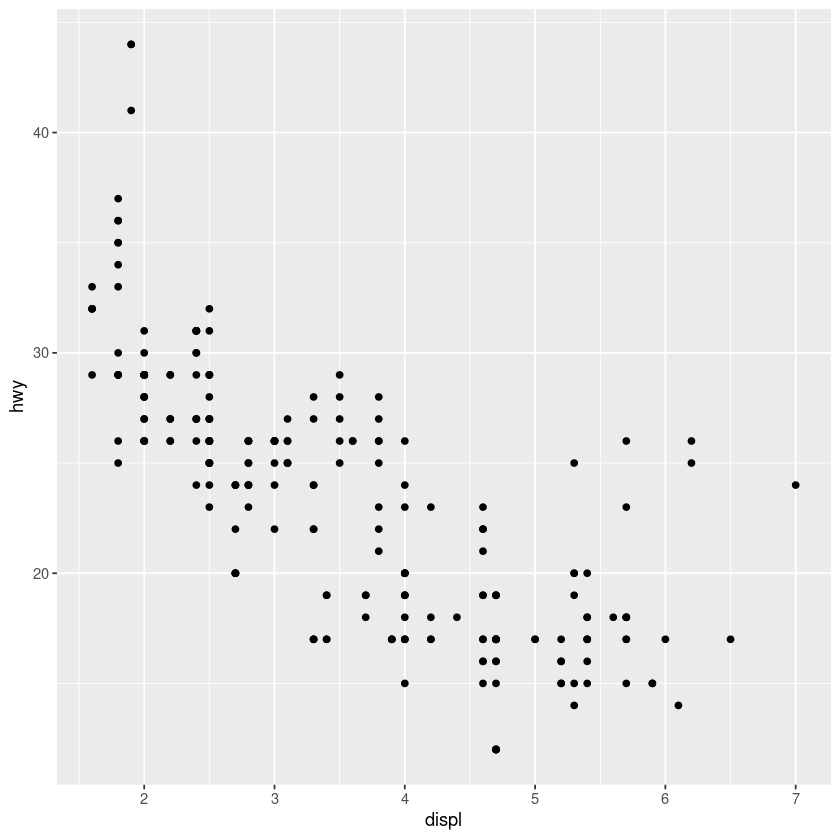

In [147]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

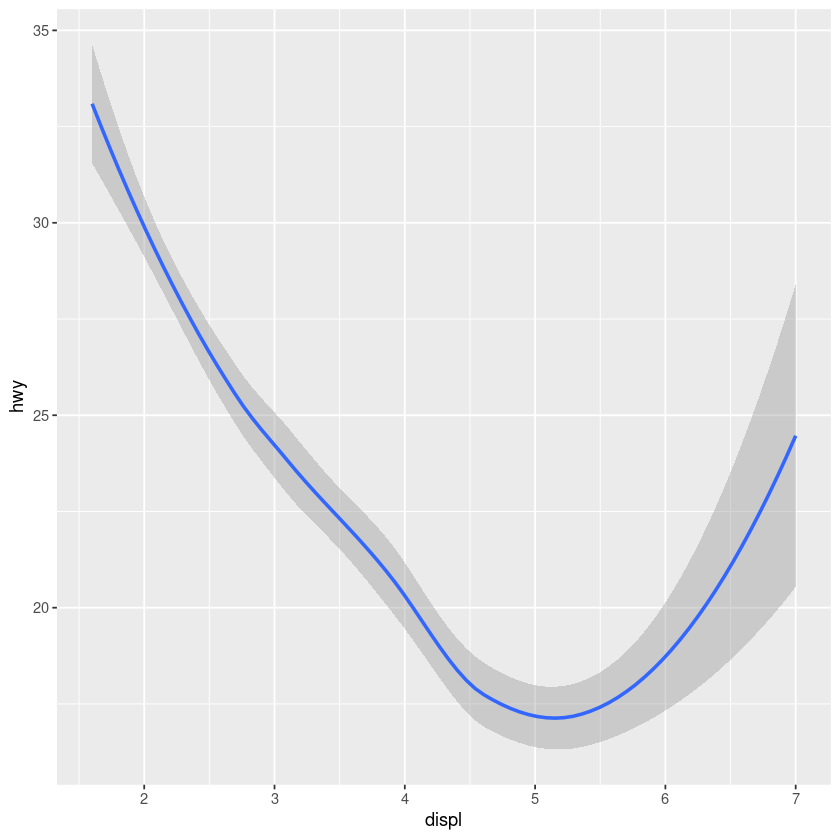

In [148]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy), method = 'loess', formula = 'y ~ x')

Every geom function in ggplot2 takes a mapping argument. How‐
ever, not every aesthetic works with every geom. You could set the
shape of a point, but you couldn’t set the “shape” of a line. On the
other hand, you could set the linetype of a line. geom_smooth() will
draw a different line, with a different linetype, for each unique value
of the variable that you map to linetype:

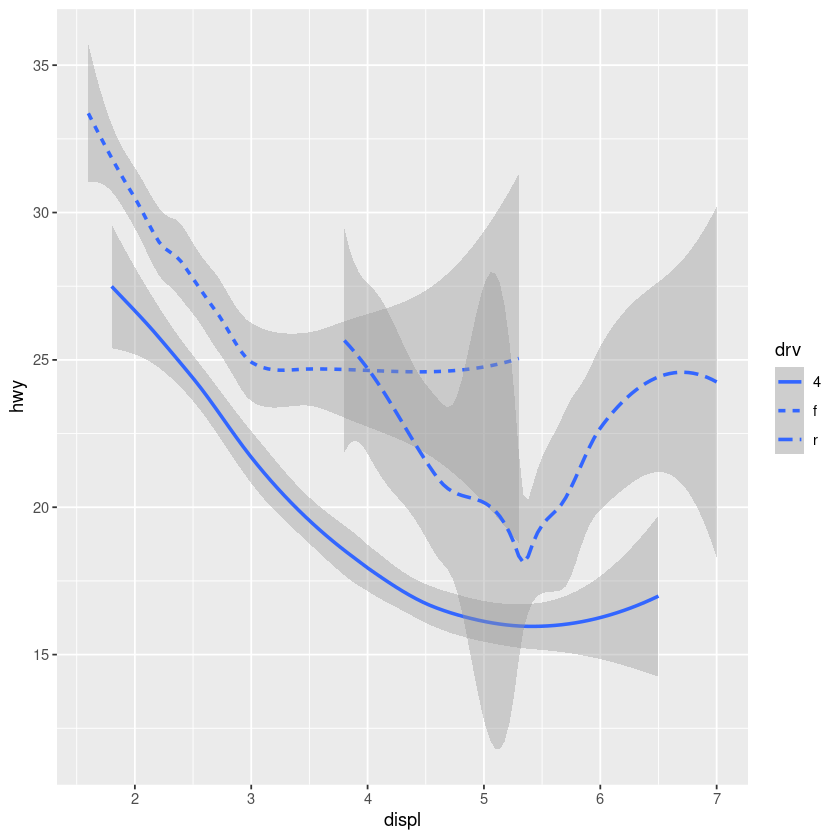

In [149]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv), method = 'loess', formula = 'y ~ x')

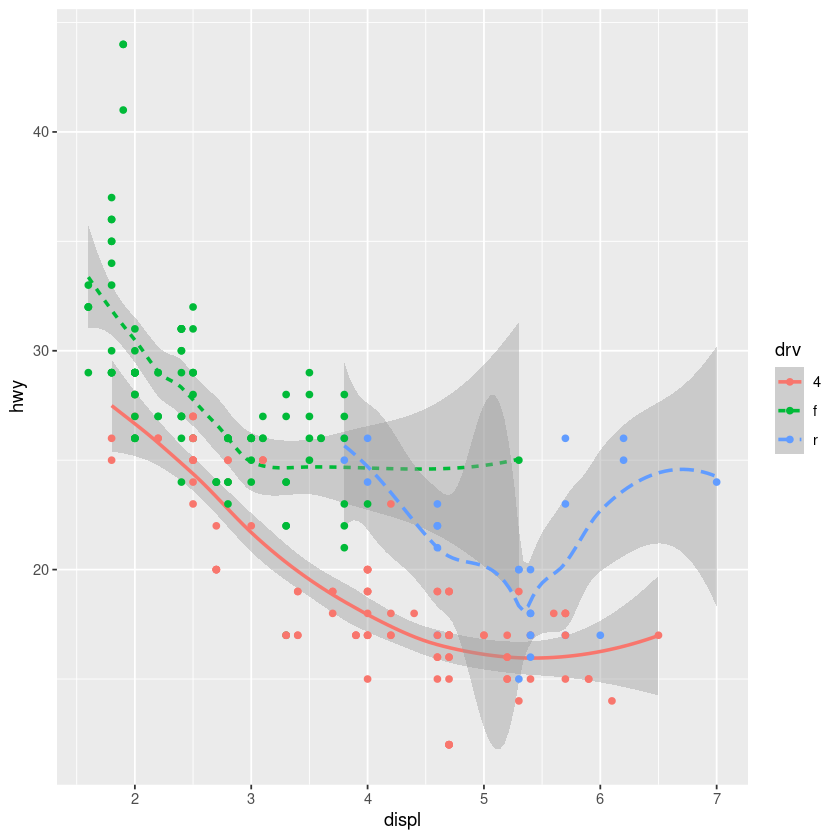

In [150]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv, color = drv), method = 'loess', formula = 'y ~ x') +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv))

Many geoms, like geom_smooth() , use a single geometric object to
display multiple rows of data. For these geoms, you can set the
group aesthetic to a categorical variable to draw multiple objects.
ggplot2 will draw a separate object for each unique value of the
grouping variable. In practice, ggplot2 will automatically group the
data for these geoms whenever you map an aesthetic to a discrete
variable (as in the linetype example). It is convenient to rely on this
feature because the group aesthetic by itself does not add a legend or
distinguishing features to the geoms:

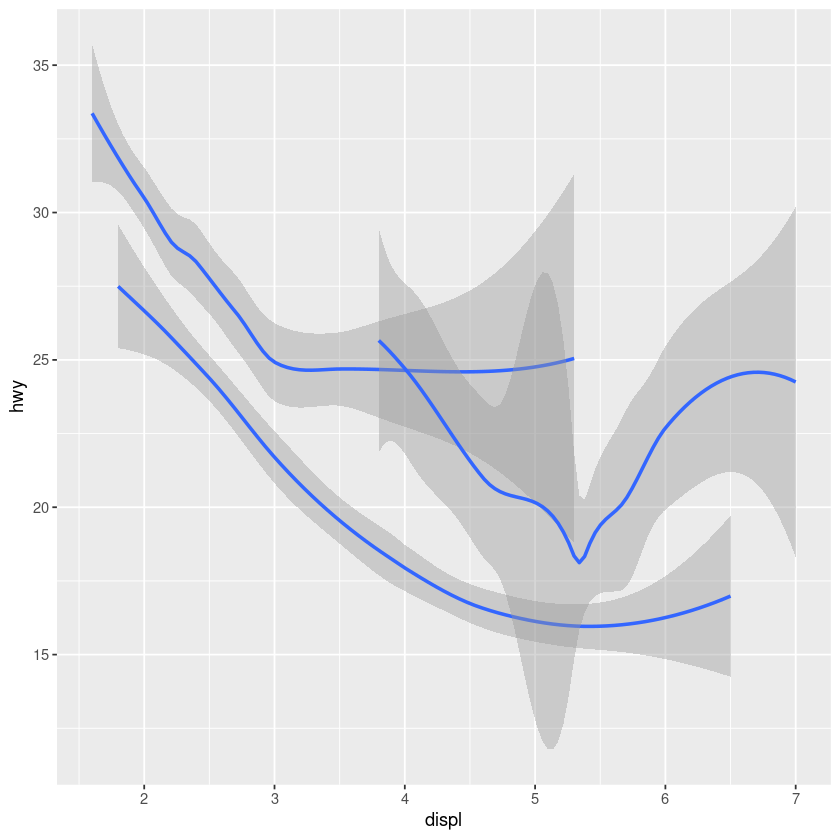

In [151]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, group = drv), method = 'loess', formula = 'y ~ x')

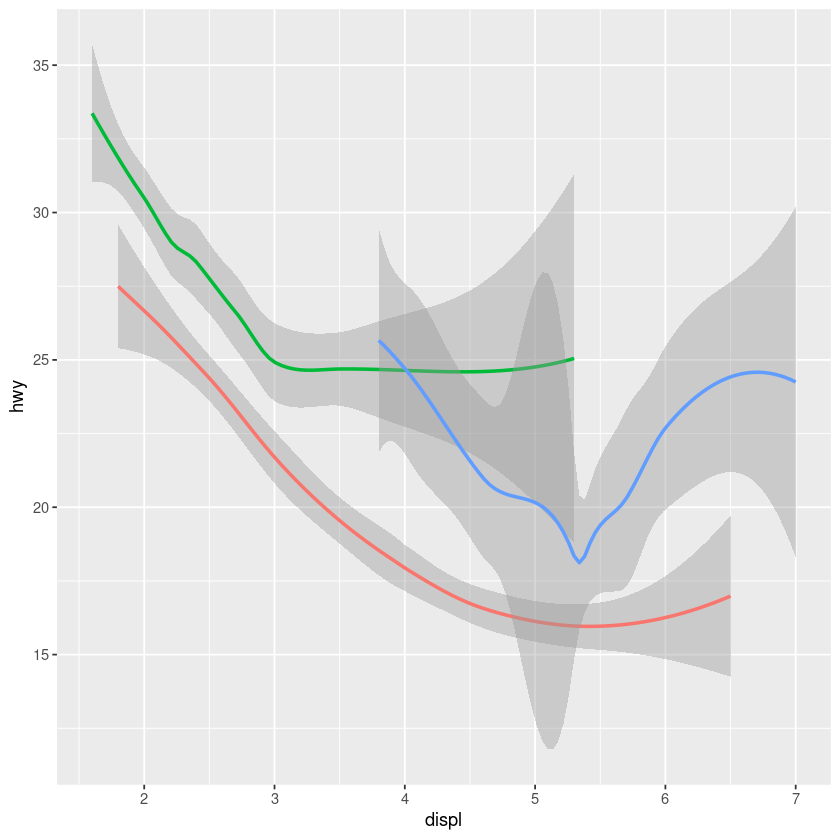

In [152]:
ggplot(data = mpg) +
    geom_smooth(mapping = aes(x = displ, y = hwy, color = drv), show.legend = FALSE,
                method = 'loess', formula = 'y ~ x')

To display multiple geoms in the same plot, add multiple geom
functions to ggplot() :

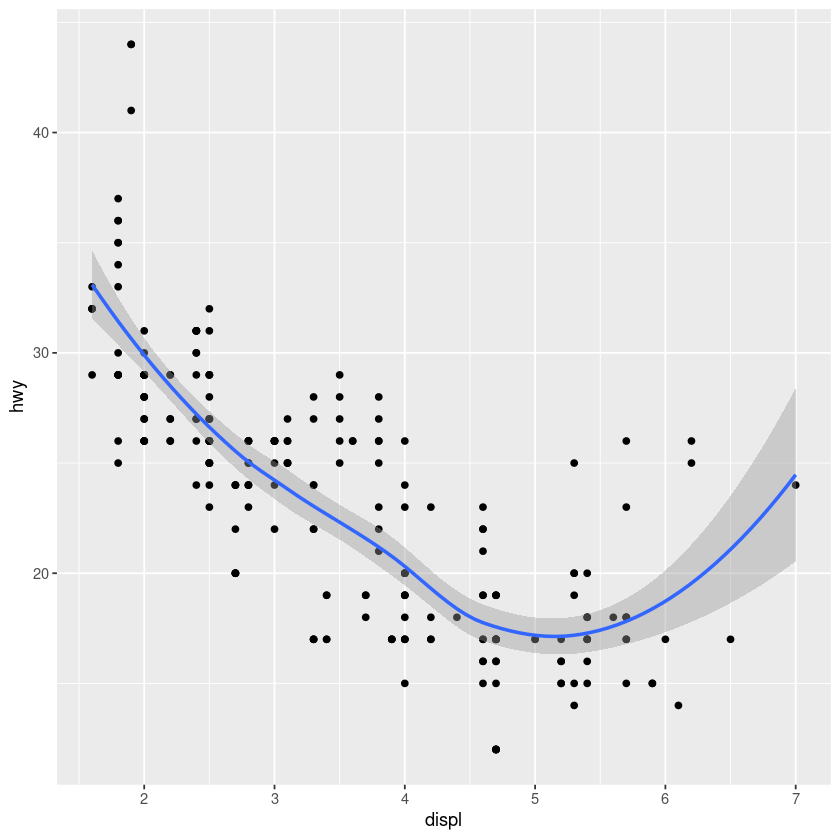

In [153]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy)) +
    geom_smooth(mapping = aes(x = displ, y = hwy),
                method = 'loess', formula = 'y ~ x')

This, however, introduces some duplication in our code. Imagine if
you wanted to change the y-axis to display cty instead of hwy . You’d
need to change the variable in two places, and you might forget to
update one. You can avoid this type of repetition by passing a set of
mappings to ggplot() . ggplot2 will treat these mappings as global
mappings that apply to each geom in the graph. In other words, this
code will produce the same plot as the previous code:

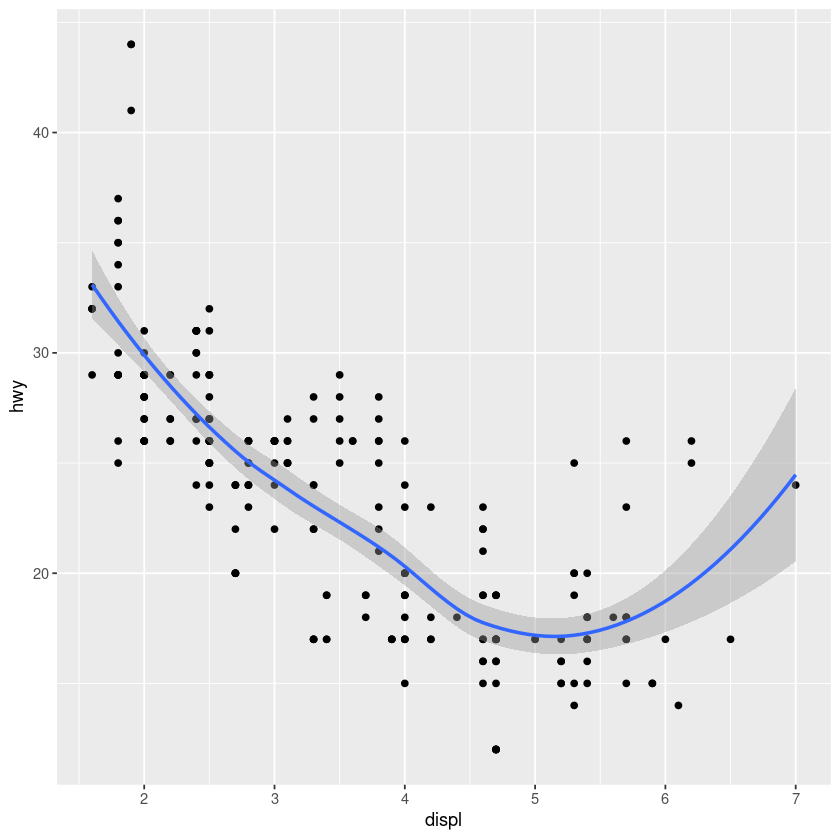

In [154]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(method = 'loess', formula = 'y ~ x')

If you place mappings in a geom function, ggplot2 will treat them as
local mappings for the layer. It will use these mappings to extend or
overwrite the global mappings for that layer only. This makes it pos‐
sible to display different aesthetics in different layers:

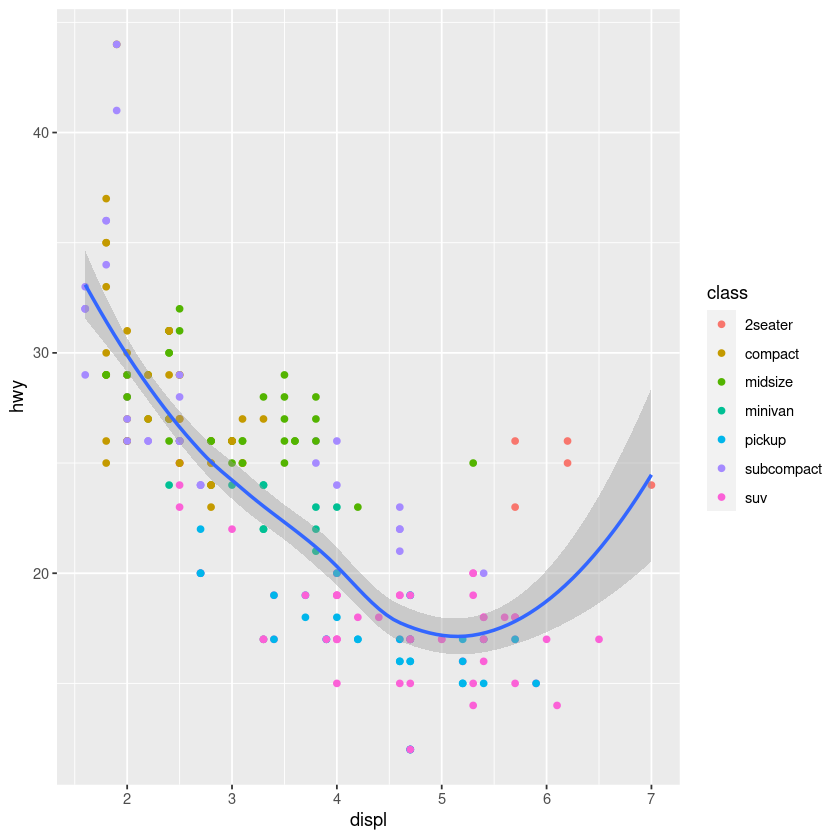

In [155]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth(method = 'loess', formula = 'y ~ x')

You can use the same idea to specify different data for each layer.
Here, our smooth line displays just a subset of the mpg dataset, the
subcompact cars. The local data argument in geom_smooth() over‐
rides the global data argument in ggplot() for that layer only:

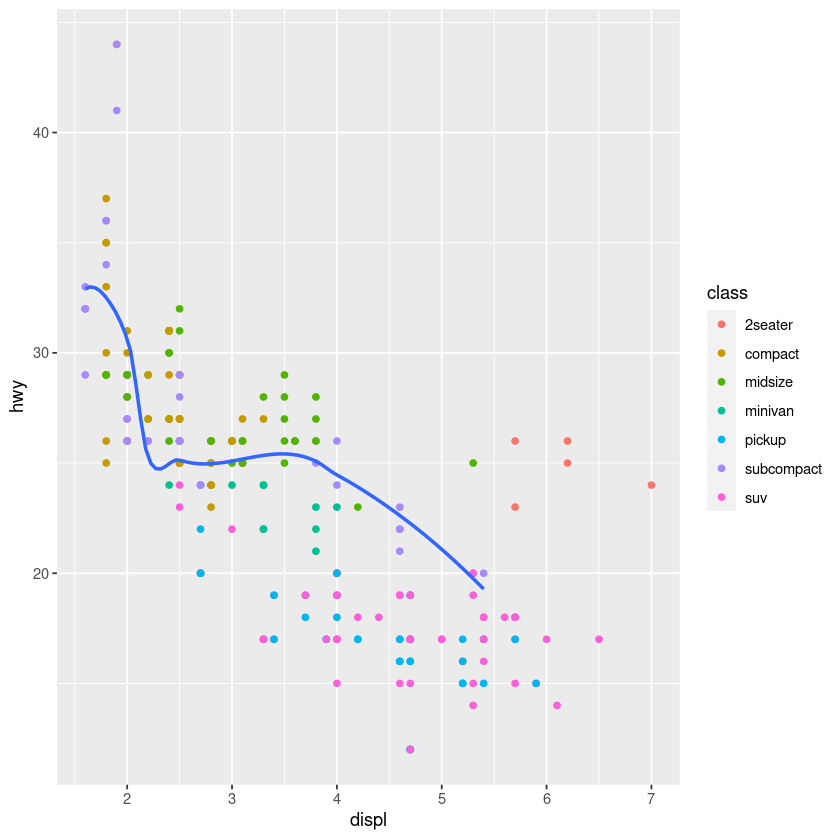

In [156]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth(data = filter(mpg, class == 'subcompact'), se = FALSE,
                method = 'loess', formula = 'y ~ x')

In [157]:
# What geom would you use to draw a line chart? A boxplot? A
# histogram? An area chart?
# 
#    line chart: geom_line()
#    boxplot: geom_boxplot()
#    histogram: geom_histogram()
#    area chart: geom_area()

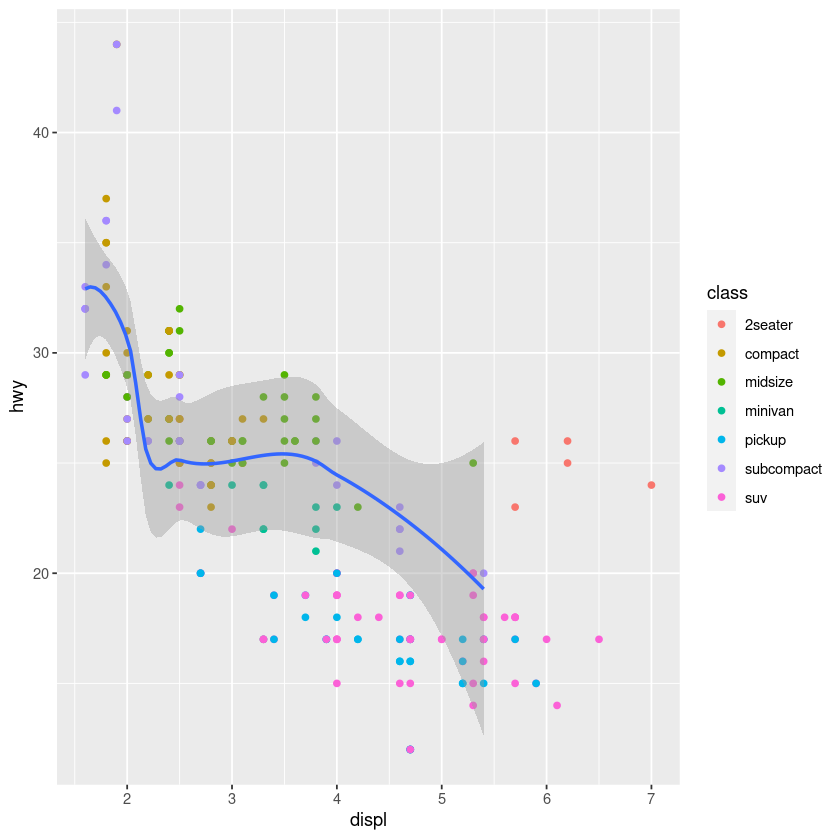

In [158]:
# What does the se argument to geom_smooth() do?
# adds or removes de Standard Error regions/bands of the lines
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = class)) +
    geom_smooth(data = filter(mpg, class == 'subcompact'), se = TRUE,
                method = 'loess', formula = 'y ~ x')

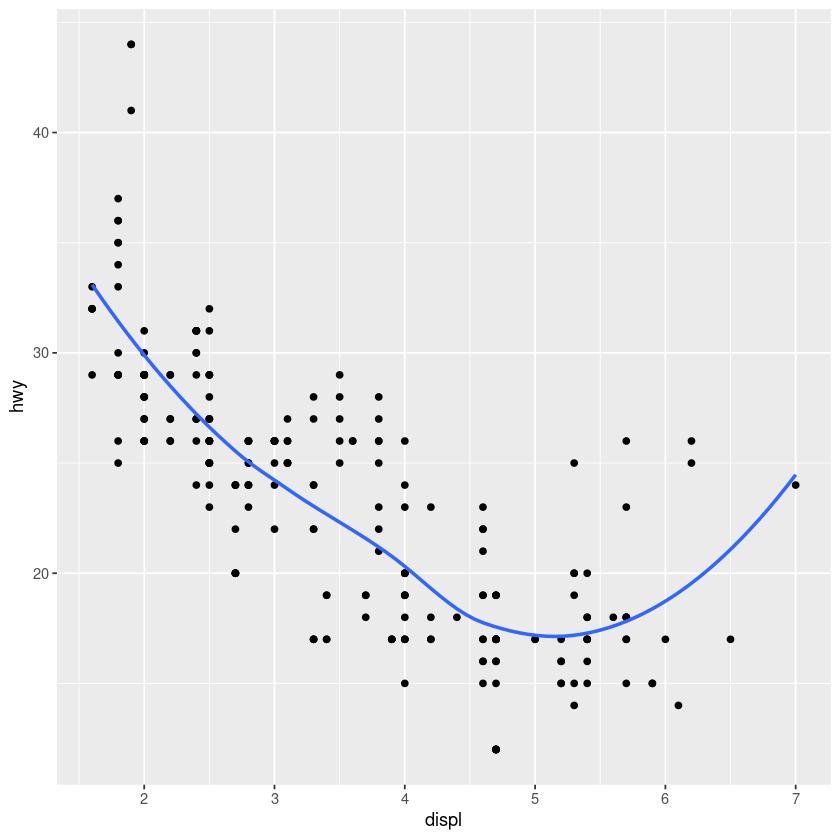

In [159]:
# recreate the graphs (excercise 6)
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(se = FALSE, method = 'loess', formula = 'y ~ x')

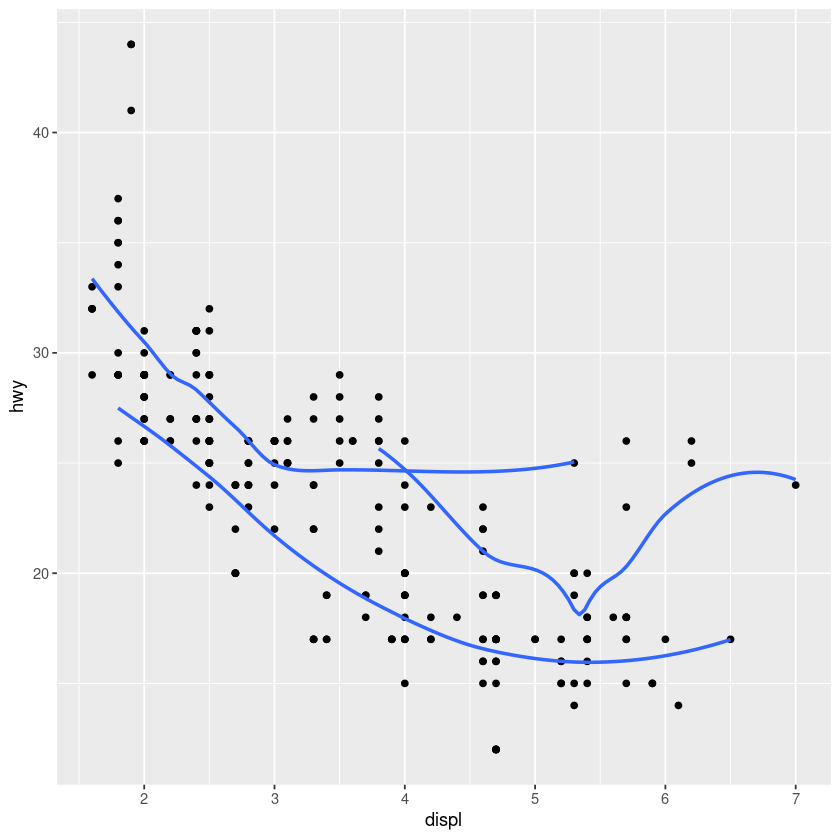

In [160]:
# recreate the graphs (excercise 6)
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(mapping = aes(group = drv), se = FALSE, method = 'loess', formula = 'y ~ x')

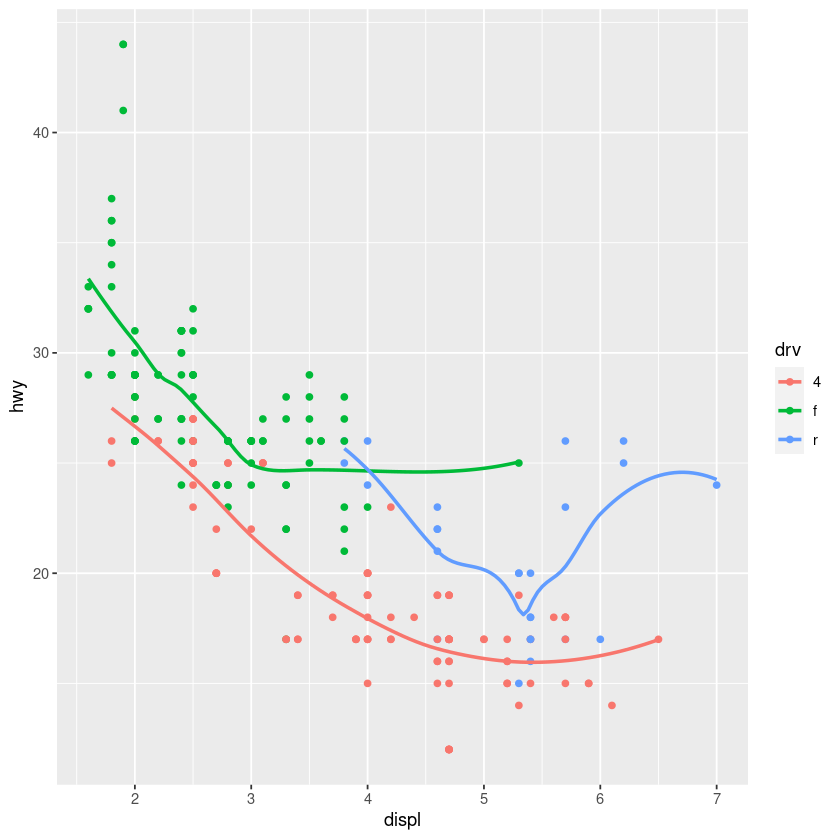

In [161]:
# recreate the graphs (excercise 6)
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = drv)) +
    geom_smooth(mapping = aes(color = drv), se = FALSE, method = 'loess', formula = 'y ~ x')

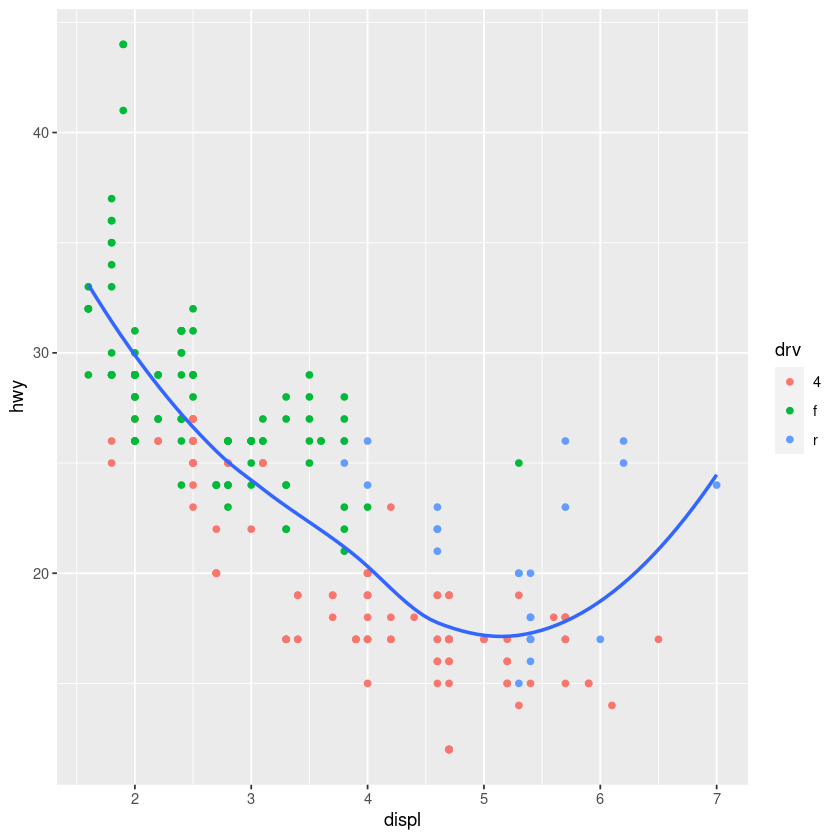

In [162]:
# recreate the graphs (excercise 6)
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = drv)) +
    geom_smooth(se = FALSE, method = 'loess', formula = 'y ~ x')

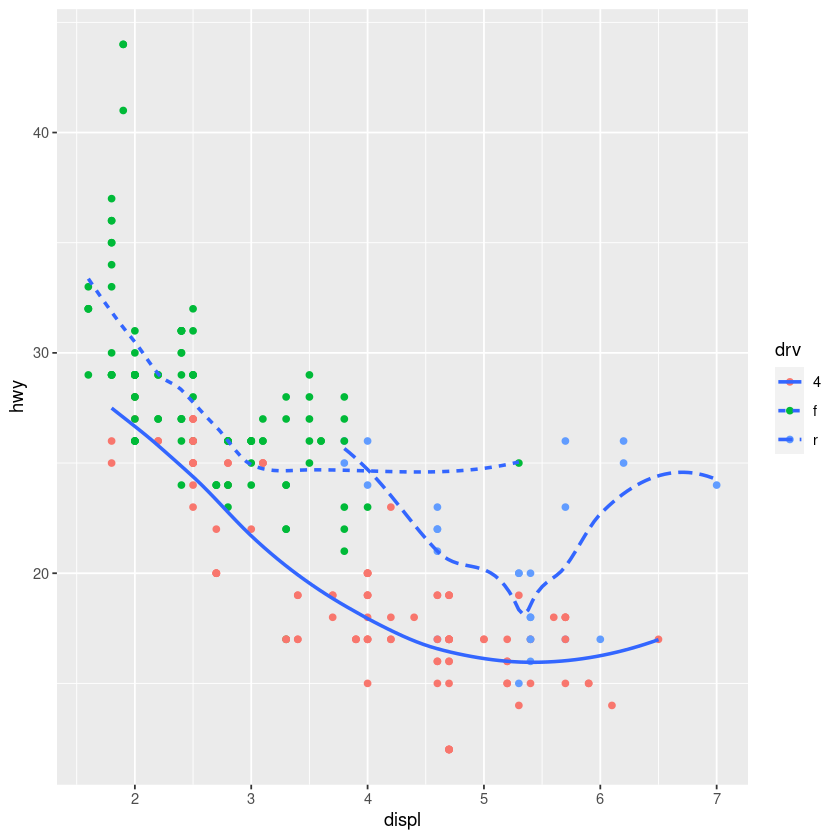

In [163]:
# recreate the graphs (excercise 6)
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_point(mapping = aes(color = drv)) +
    geom_smooth(mapping = aes(linetype = drv), se = FALSE, method = 'loess', formula = 'y ~ x')

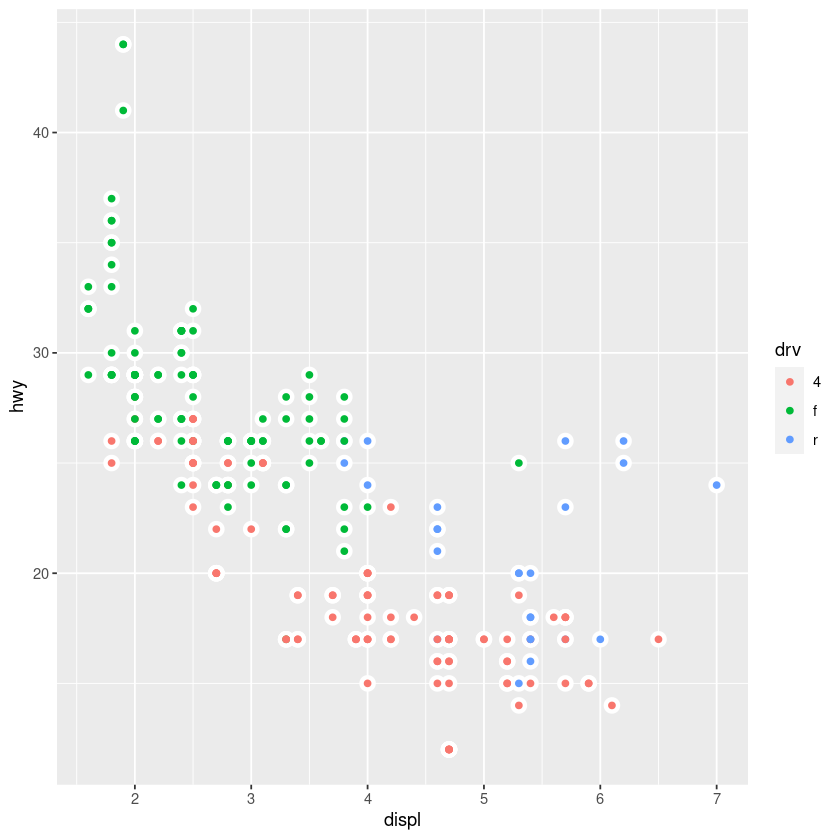

In [164]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(size = 4, color = "white") +
  geom_point(mapping = aes(colour = drv))

## __Statistical Transformations__

Next, let’s take a look at a bar chart. Bar charts seem simple, but they
are interesting because they reveal something subtle about plots.
Consider a basic bar chart, as drawn with geom_bar() . The follow‐
ing chart displays the total number of diamonds in the diamonds
dataset, grouped by cut . The diamonds dataset comes in ggplot2
and contains information about ~54,000 diamonds, including the
price , carat , color , clarity , and cut of each diamond. The chart
shows that more diamonds are available with high-quality cuts than
with low quality cuts:

In [165]:
?diamonds

diamonds {ggplot2},R Documentation


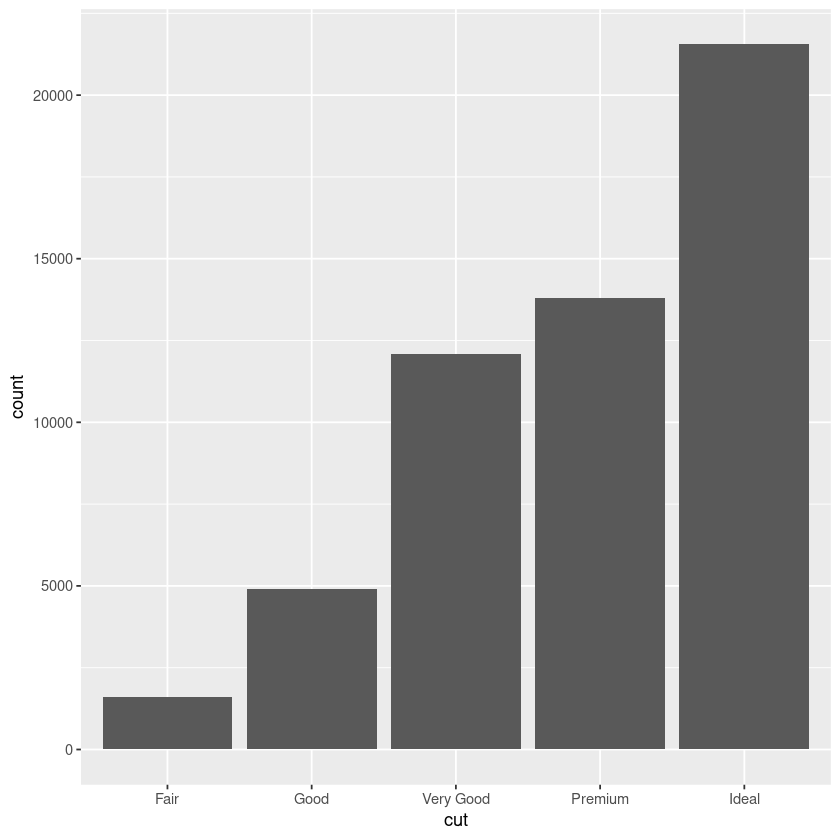

In [166]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

On the x-axis, the chart displays cut , a ‘variable from diamonds . On
the y-axis, it displays count , but count is not a variable in diamonds !
Where does count come from? Many graphs, like scatterplots, plot
the raw values of your dataset. Other graphs, like bar charts, calcu‐
late new values to plot:

+ Bar charts, histograms, and frequency polygons bin your data
    and then plot bin counts, the number of points that fall in each
    bin.

+ Smoothers fit a model to your data and then plot predictions
    from the model.
    
+ Boxplots compute a robust summary of the distribution and
    display a specially formatted box.

The algorithm used to calculate new values for a graph is called a
stat, short for statistical transformation.

You can generally use geoms and stats interchangeably. For example,
you can re-create the previous plot using stat_count() instead of
geom_bar() :

You can learn which stat a geom uses by inspecting the default value
for the stat argument. For example, ?geom_bar shows the default
value for stat is “count,” which means that geom_bar() uses
stat_count() . stat_count() is documented on the same page as
geom_bar() , and if you scroll down you can find a section called
“Computed variables.” That tells that it computes two new variables:
count and prop .
You can generally use geoms and stats interchangeably. For example,
you can re-create the previous plot using stat_count() instead of
geom_bar() :

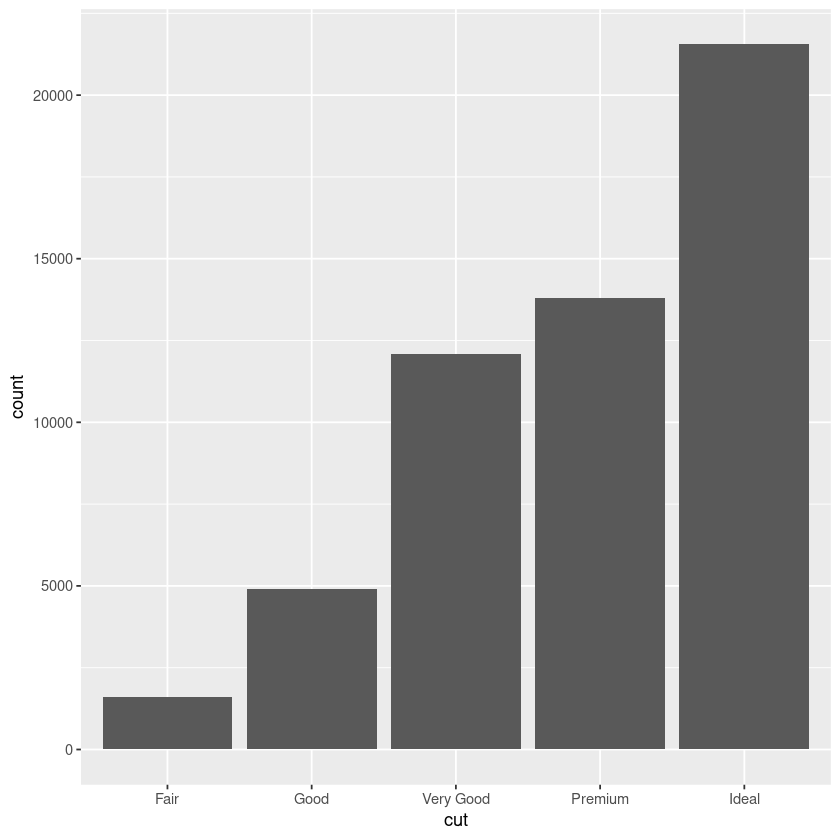

In [167]:
ggplot(data = diamonds) +
    stat_count(mapping = aes(x = cut))

This works because every geom has a default stat, and every stat has
a default geom. This means that you can typically use geoms
without worrying about the underlying statistical transformation.
There are three reasons you might need to use a stat explicitly:

+ You might want to override the default stat. In the following
    code, I change the stat of geom_bar() from count (the default)
    to identity. This lets me map the height of the bars to the raw
    values of a y variable. Unfortunately when people talk about bar
    charts casually, they might be referring to this type of bar chart,
    where the height of the bar is already present in the data, or the
    previous bar chart where the height of the bar is generated by
    counting rows.
    

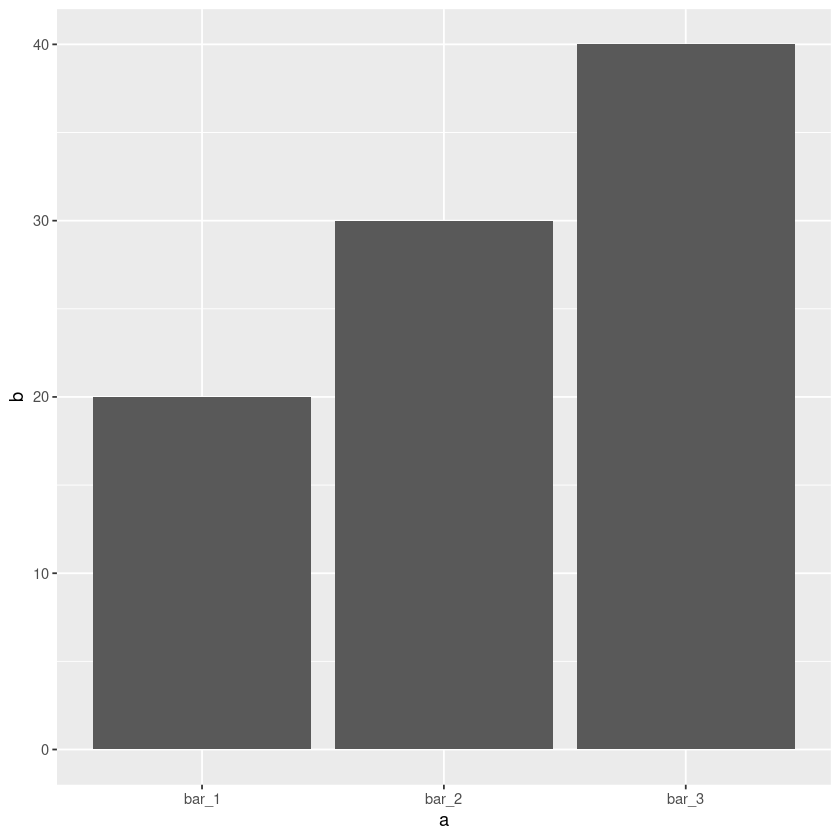

In [168]:
demo <- tribble(
    ~a, ~b,
    'bar_1', 20,
    'bar_2', 30,
    'bar_3', 40
)

ggplot(data = demo) +
    geom_bar(mapping = aes(x = a, y = b), stat = 'identity')

+ You might want to override the default mapping from trans‐
    formed variables to aesthetics. For example, you might want to
    display a bar chart of proportion, rather than count:

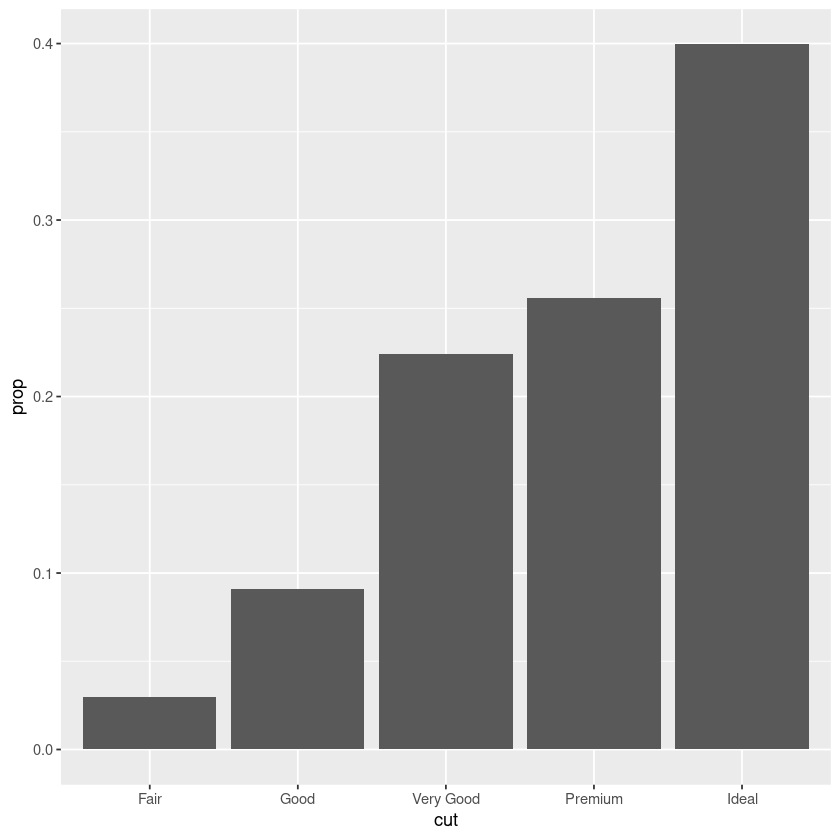

In [169]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

You might want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary() , which summarizes the y values for each unique x value,
to draw attention to the summary that you’re computing:

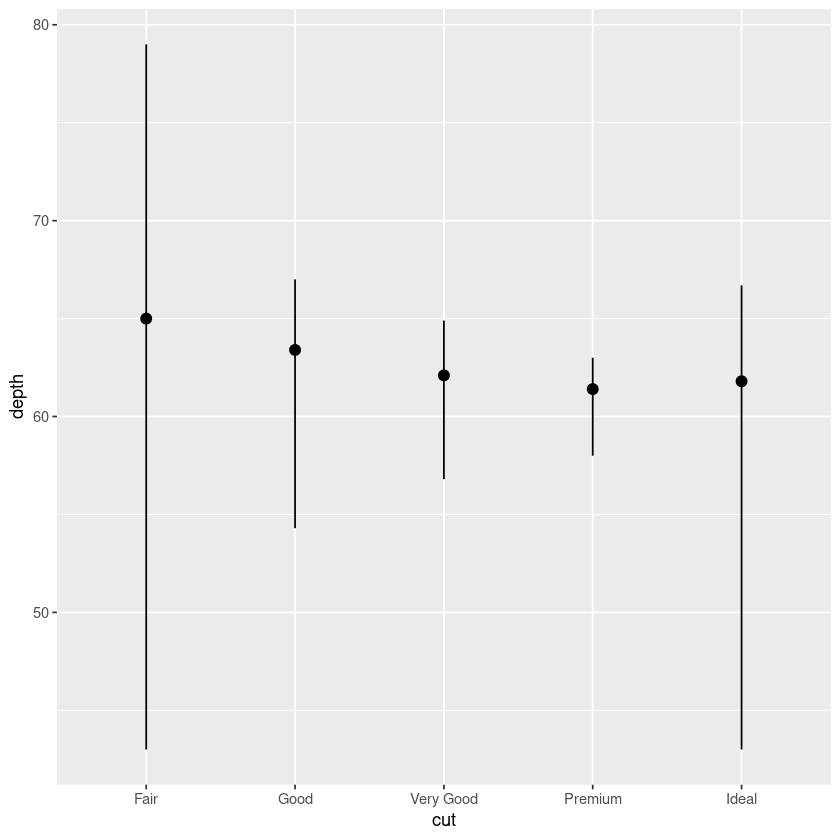

In [170]:
ggplot(data = diamonds) +
    stat_summary(
        mapping = aes(x = cut, y = depth),
        fun.min = min,
        fun.max = max,
        fun = median
    )

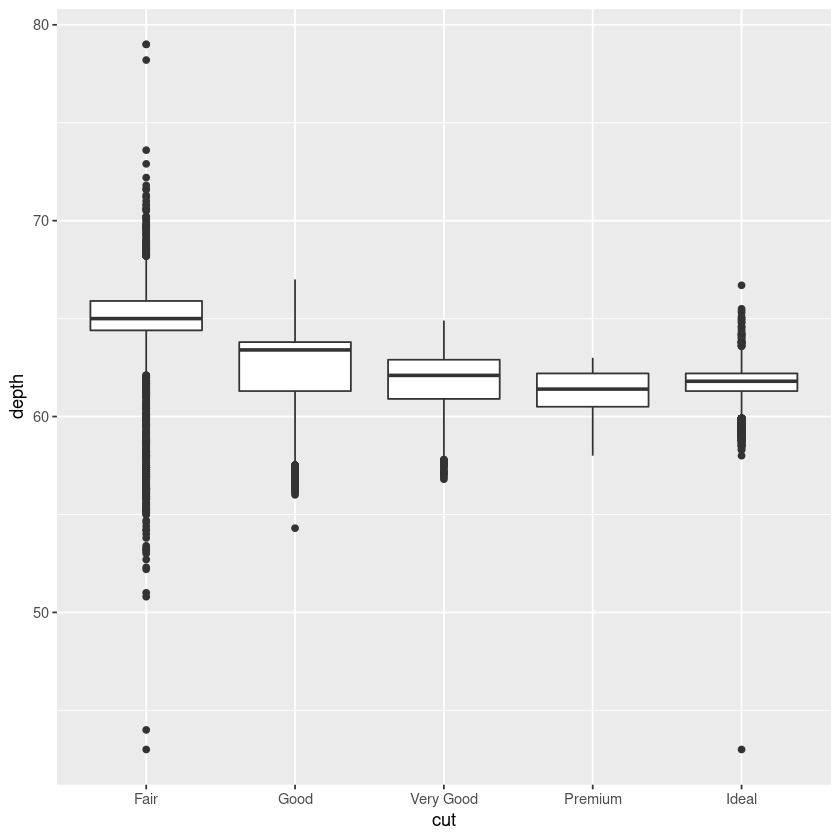

In [171]:
ggplot(data = diamonds, mapping = aes(x = cut, y = depth)) +
    geom_boxplot()

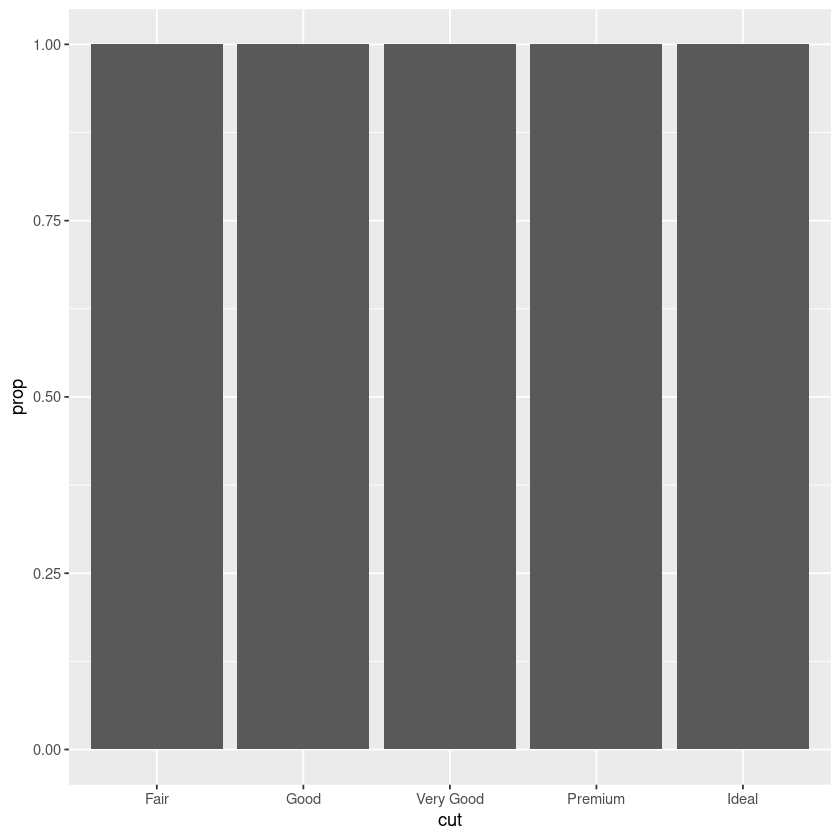

In [172]:
# In our proportion bar chart, we need to set group = 1 . Why? In
# other words what is the problem with these two graphs?
# If group = 1 is not included, then all the bars in the plot will have the same height, a height of 1.
# The function geom_bar() assumes that the groups are equal to the x values since the stat computes the
# counts within the group.
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop..))

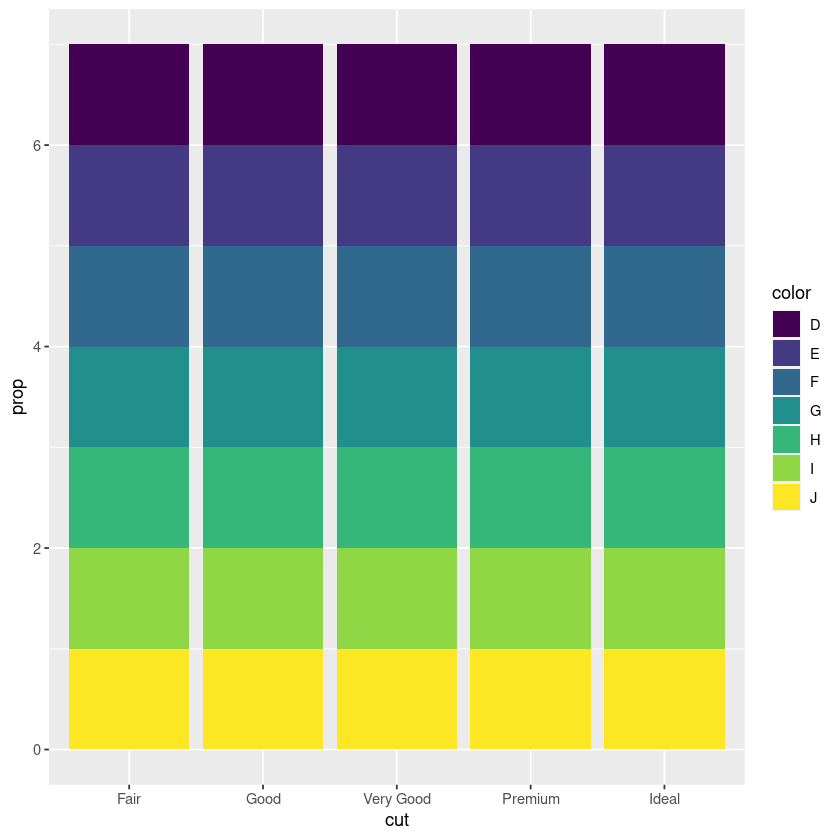

In [173]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, y = ..prop.., fill = color))

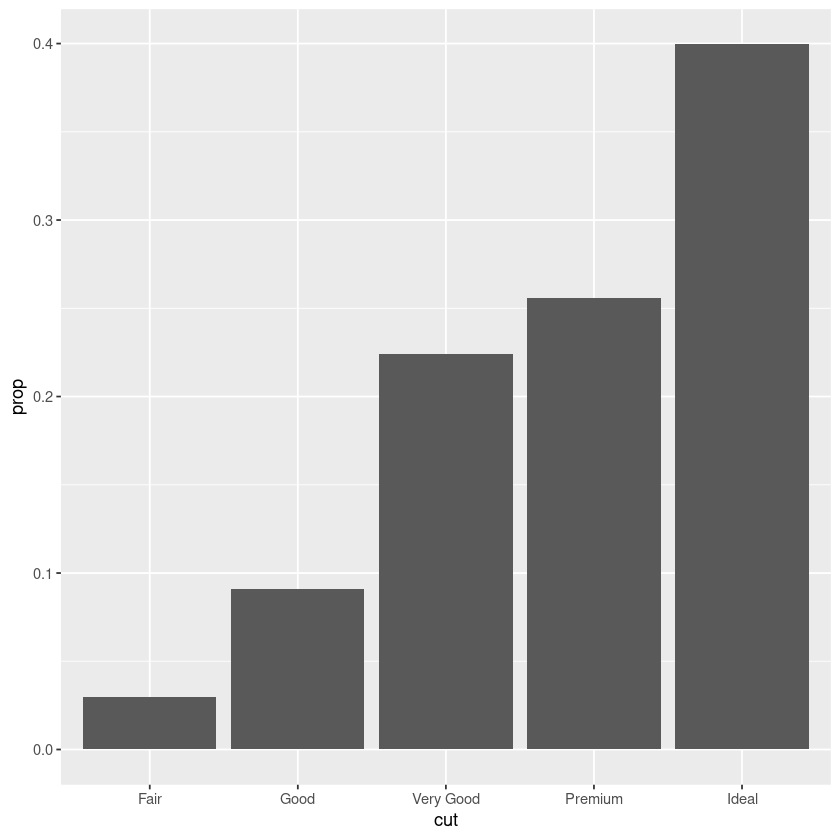

In [174]:
# The following code will produce the intended stacked bar
# charts for the case with no fill aesthetic.
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

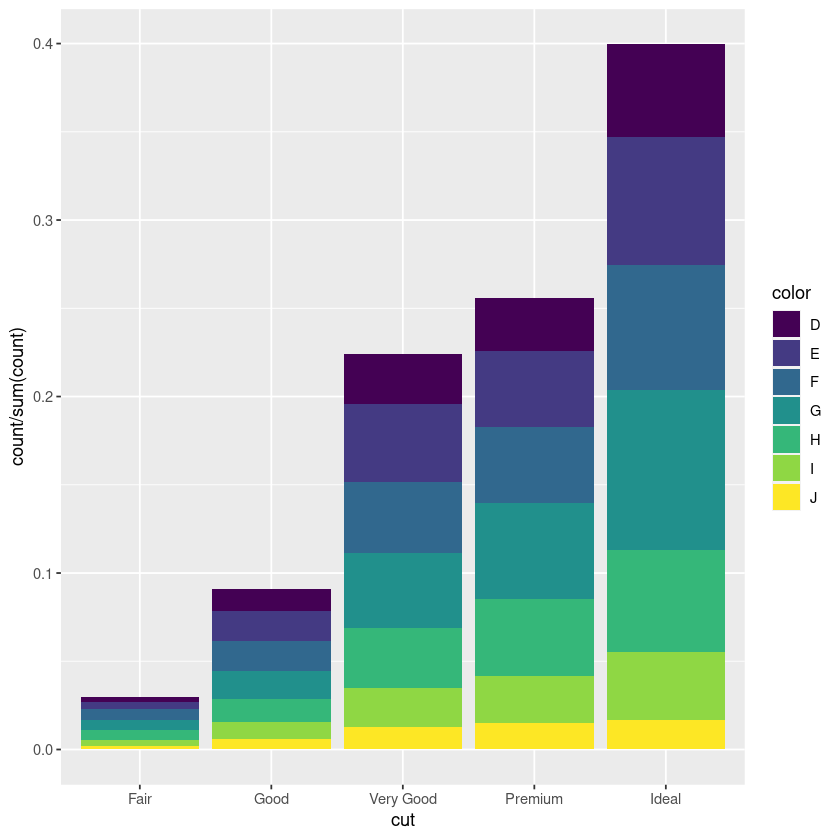

In [175]:
# With the fill aesthetic, the heights of the bars need to be normalized.
ggplot(data = diamonds) + 
  geom_bar(aes(x = cut, y = ..count.. / sum(..count..), fill = color))

## __Position Adjustments__

There’s one more piece of magic associated with bar charts. You can
color a bar chart using either the color aesthetic, or more usefully,
fill :

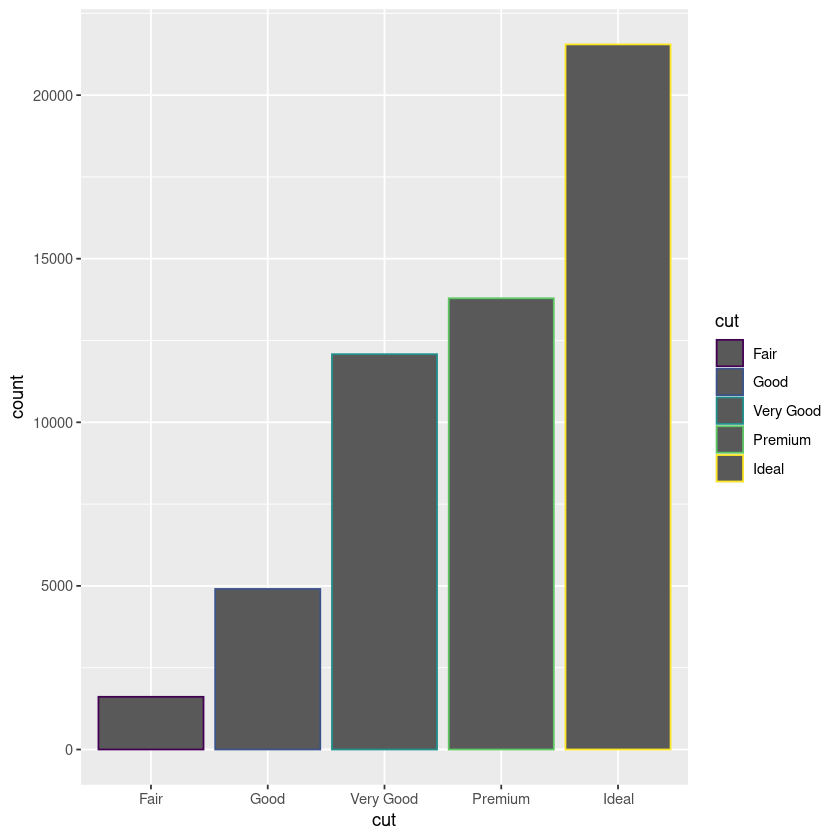

In [176]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

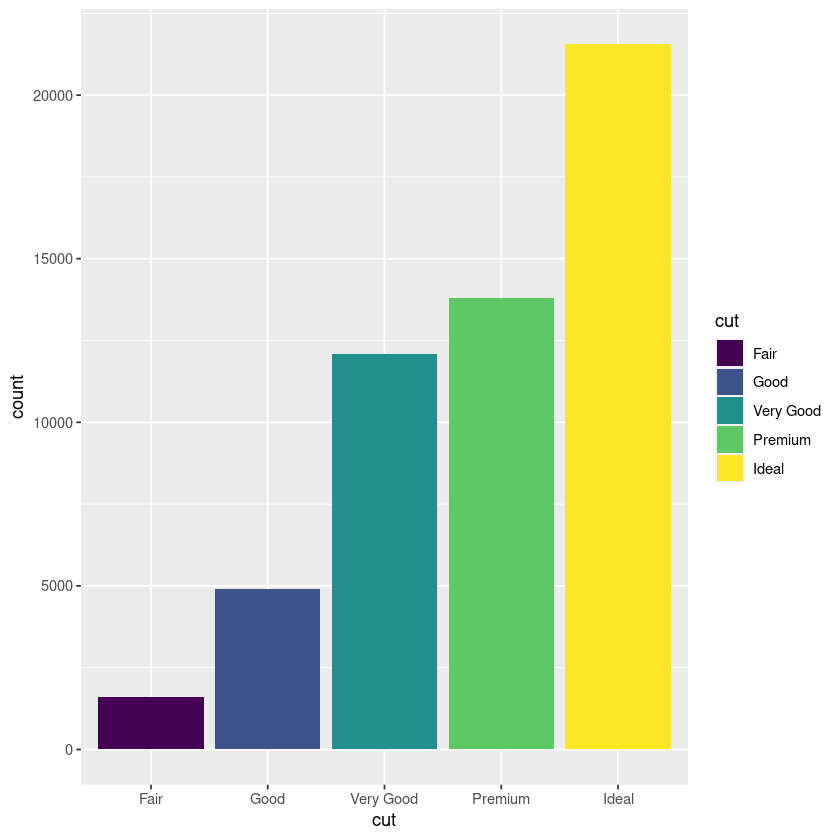

In [177]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

Note what happens if you map the fill aesthetic to another variable, like clarity : the bars are automatically stacked. Each colored
rectangle represents a combination of cut and clarity :

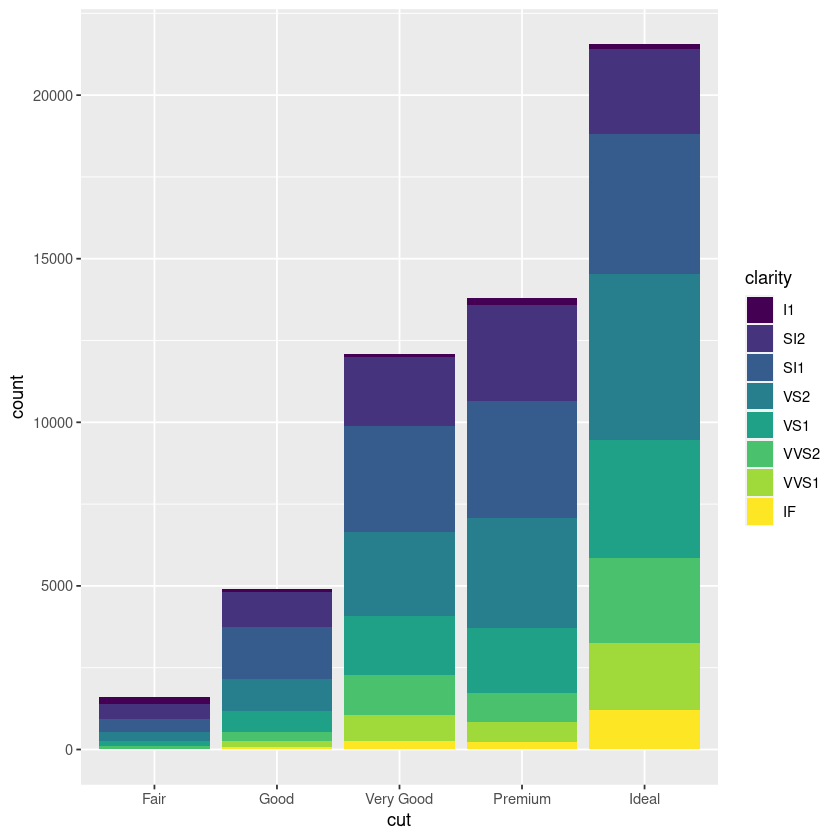

In [178]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

The stacking is performed automatically by the position adjustment
specified by the position argument. If you don’t want a stacked bar
chart, you can use one of three other options: "identity" , "dodge"
or "fill" :

position = "identity" will place each object exactly where it
falls in the context of the graph. This is not very useful for bars,
because it overlaps them. To see that overlapping we either need
to make the bars slightly transparent by setting alpha to a small
value, or completely transparent by setting fill = NA :

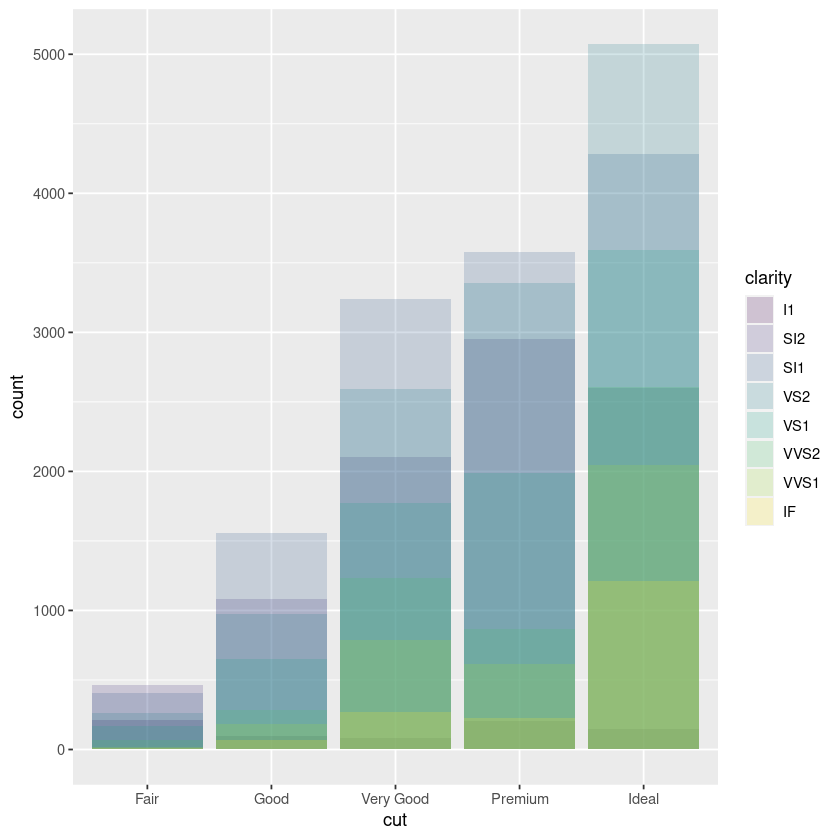

In [179]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) +
    geom_bar(alpha = 1/5, position = 'identity')

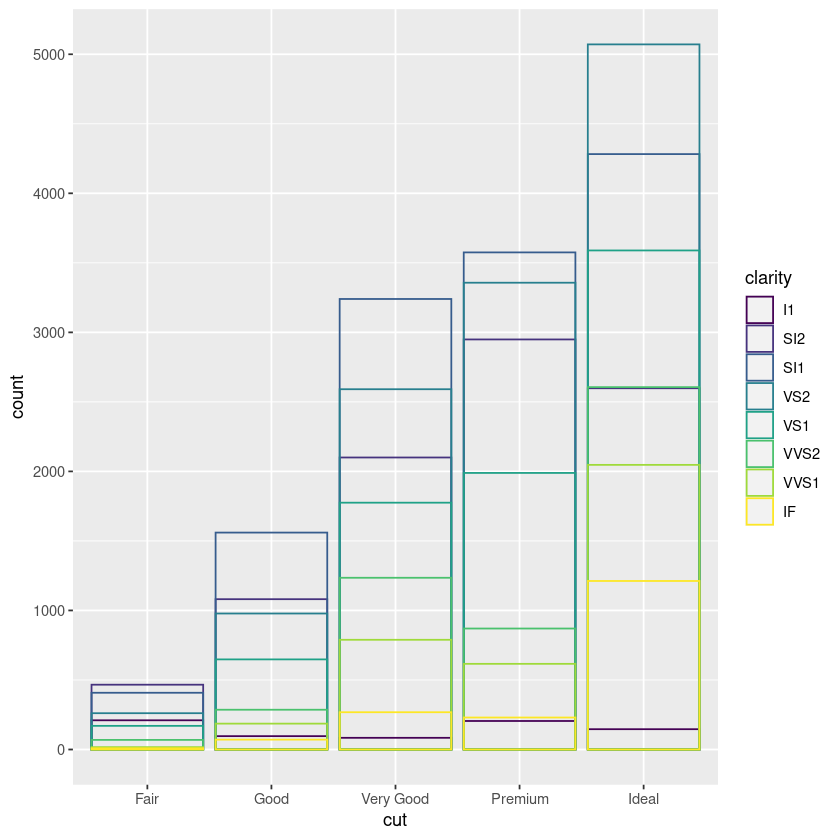

In [181]:
ggplot(data = diamonds, mapping = aes(x = cut, color = clarity)) +
    geom_bar(fill = NA, position = 'identity')

The identity position adjustment is more useful for 2D geoms,
like points, where it is the default

position = "fill" works like stacking, but makes each set of
stacked bars the same height. This makes it easier to compare
proportions across groups:

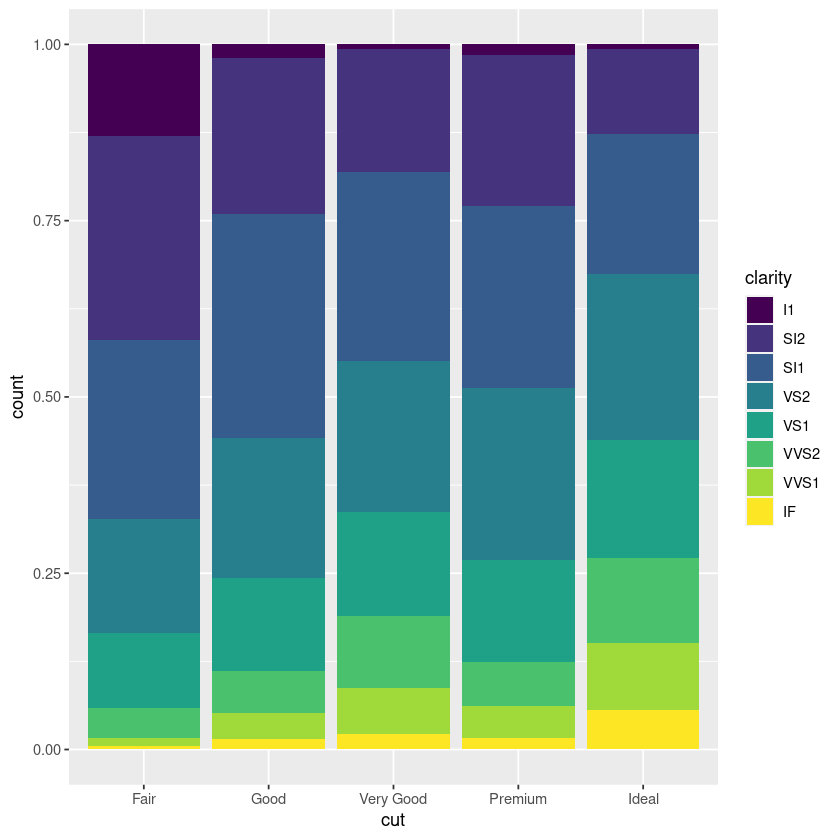

In [184]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = 'fill')

position = "dodge" places overlapping objects directly beside
one another. This makes it easier to compare individual values:

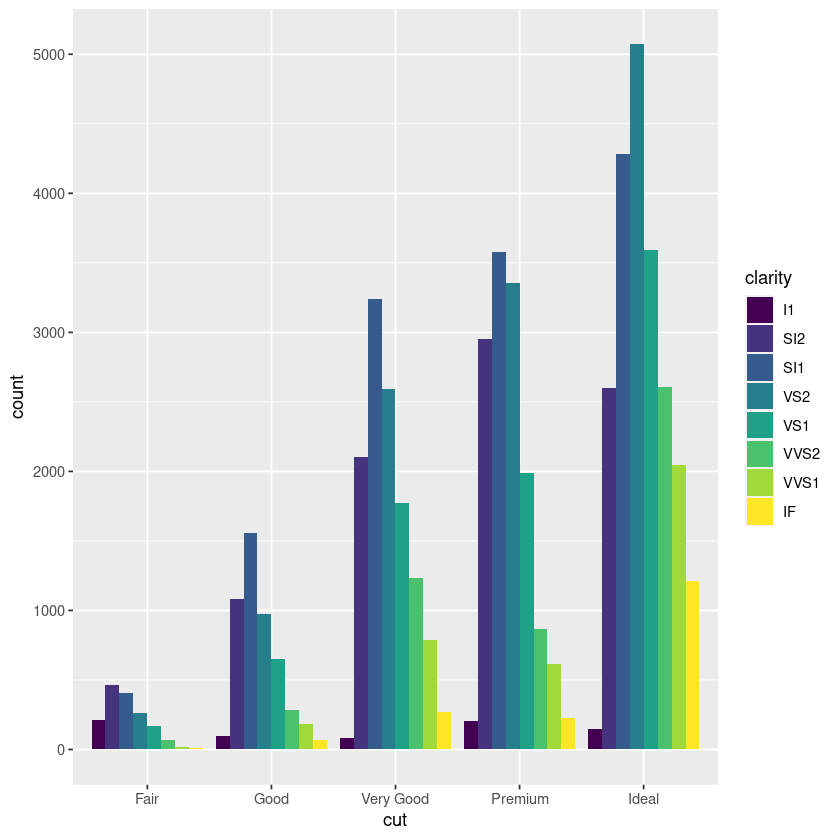

In [185]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = 'dodge')

There’s one other type of adjustment that’s not useful for bar charts,
but it can be very useful for scatterplots. Recall our first scatterplot.
Did you notice that the plot displays only 126 points, even though
there are 234 observations in the dataset?

The values of hwy and displ are rounded so the points appear on a
grid and many points overlap each other. This problem is known as
overplotting. This arrangement makes it hard to see where the mass
of the data is. Are the data points spread equally throughout the
graph, or is there one special combination of hwy and displ that
contains 109 values?
You can avoid this gridding by setting the position adjustment to
“jitter.” position = "jitter" adds a small amount of random noise
to each point. This spreads the points out because no two points are
likely to receive the same amount of random noise:

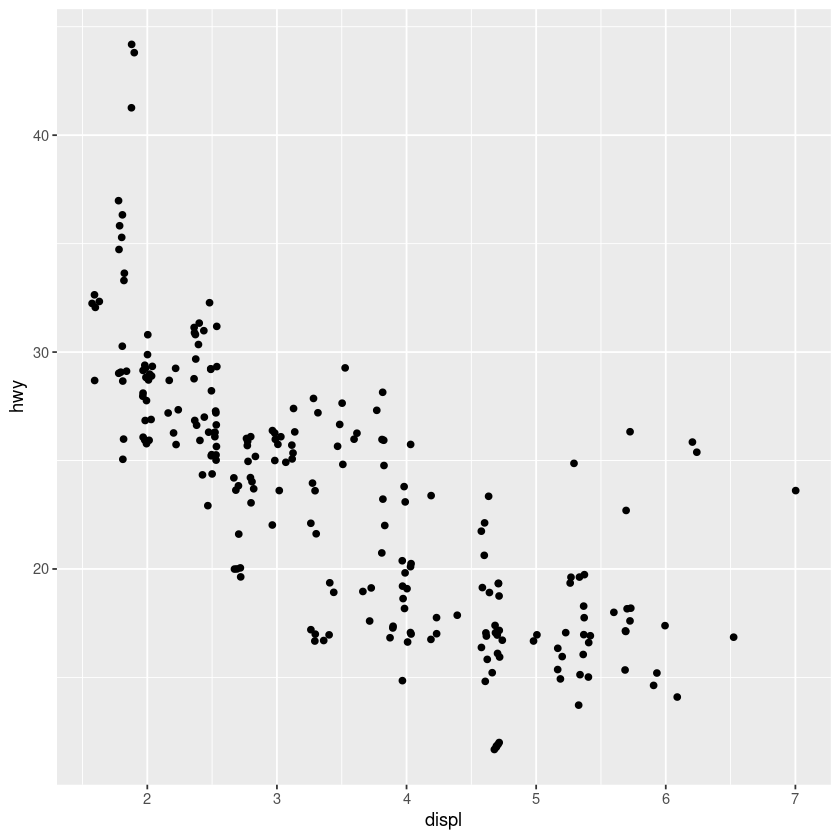

In [186]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), position = 'jitter')

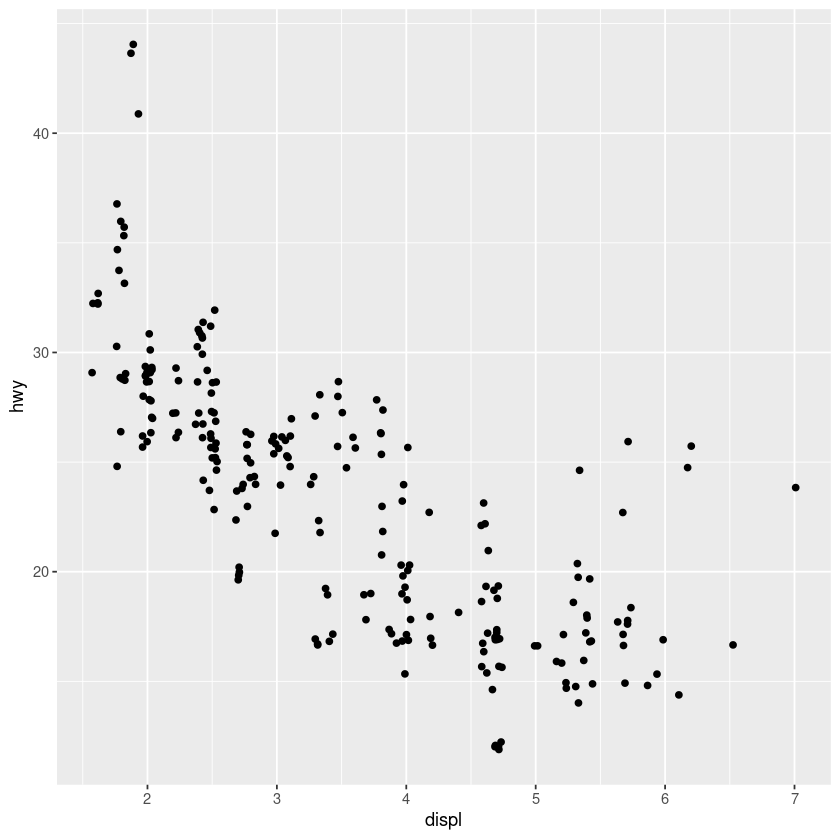

In [187]:
# also a shortcut
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
    geom_jitter()

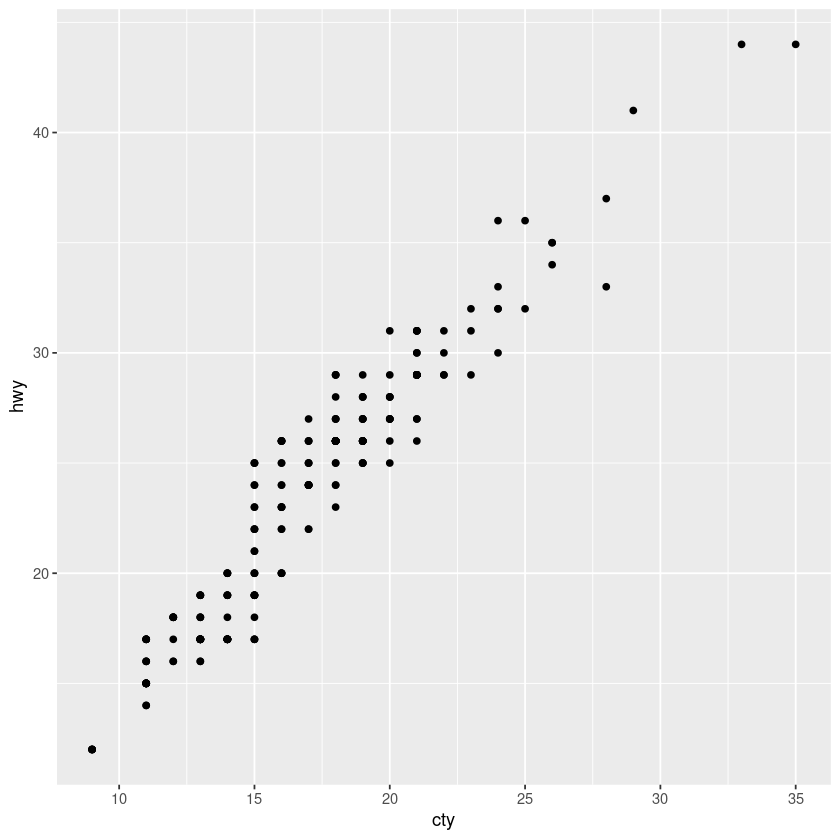

In [190]:
# What is the problem with this plot? How could you improve it?
# there may be overplotting, so I propose to use jitter
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
    geom_point()

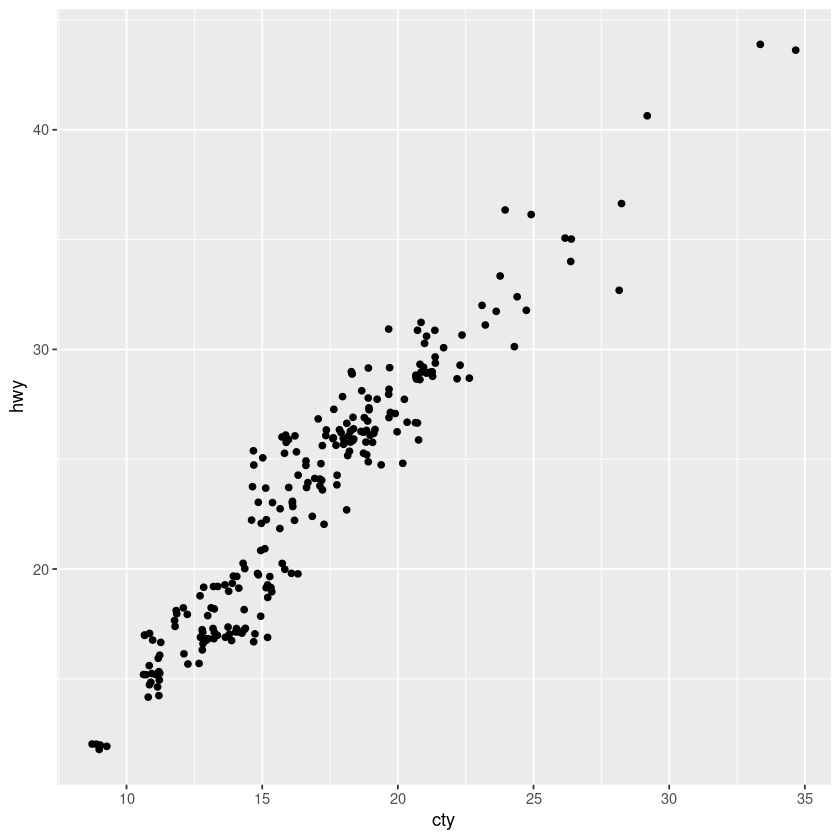

In [192]:
# we found out that indeed we had overplotting
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
    geom_jitter()

In [193]:
# Compare and contrast geom_jitter() with geom_count().

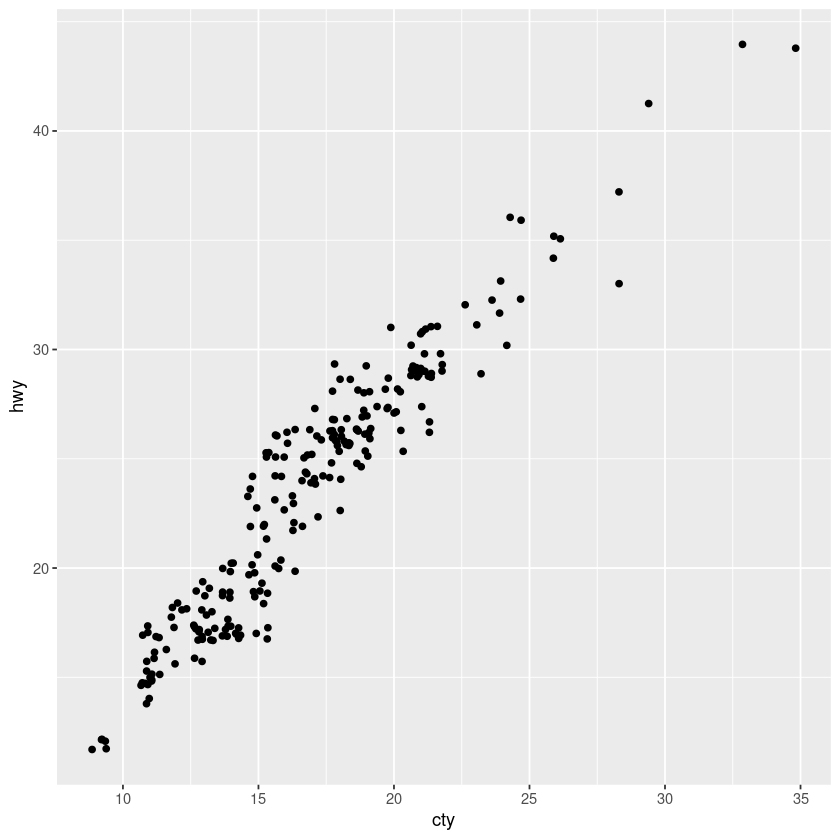

In [194]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter()

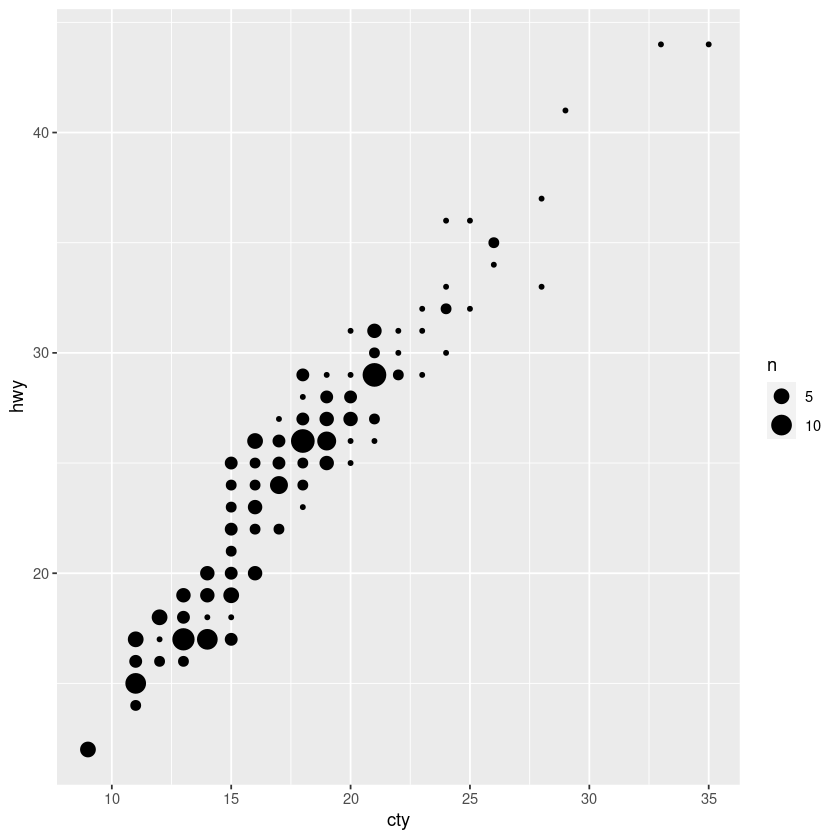

In [195]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_count()

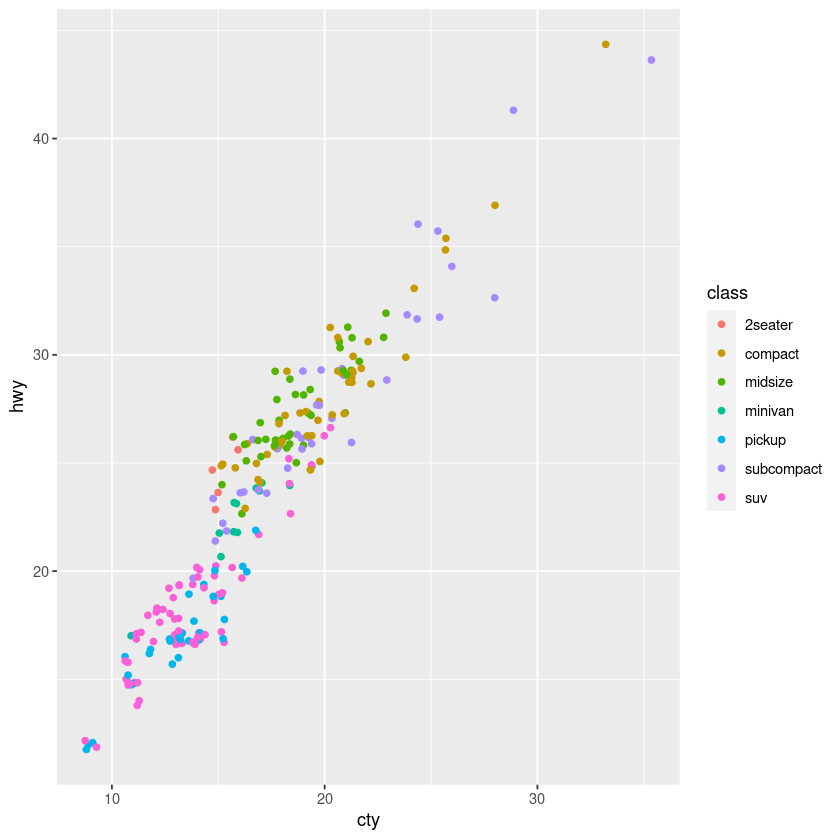

In [196]:
# The geom_count() geom does not change x and y coordinates of the points.
# However, if the points are close together and counts are large, the size of some points can itself create overplotting.
ggplot(data = mpg, mapping = aes(x = cty, y = hwy, color = class)) +
  geom_jitter()

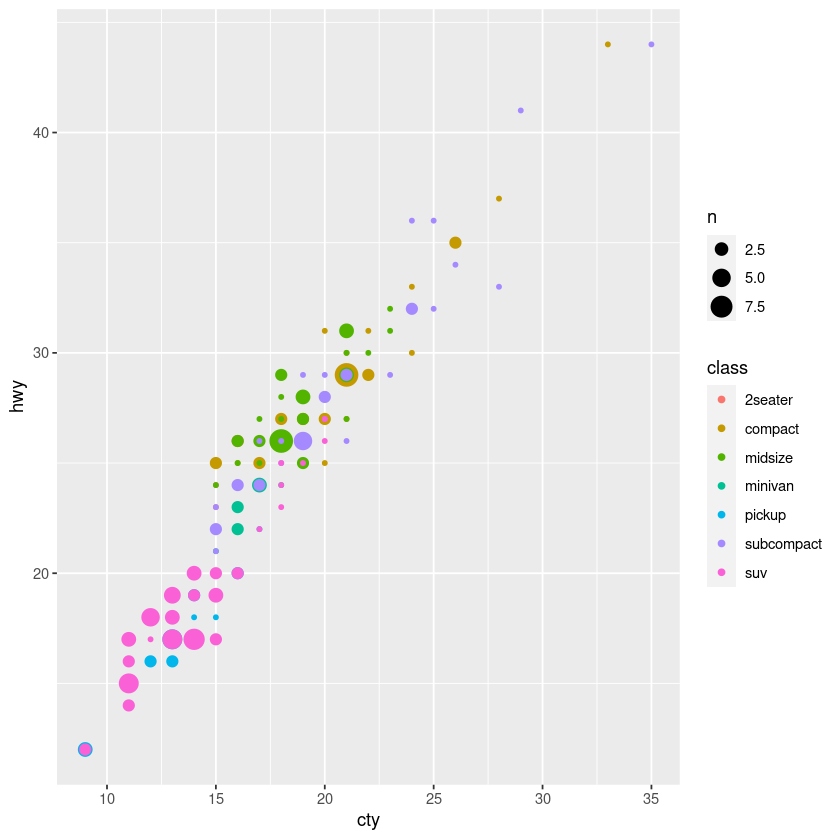

In [197]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy, color = class)) +
  geom_count()

In [ ]:
# comb
ggplot(data = mpg, mapping = aes(x = cty, y = hwy, color = class)) +
  geom_count(position = "jitter")